<h2>
<span style="color:#6852A3">
Мазур Анастасия Вадимовна, 316
</span>
</h2>

<span style="color:#410083">
<h1>
Анализ данных, связанных с баскетбольными игроками NBA
</h1>
</span>

Данное задание необходимо было реализовать на собственных данных. Я захотела проанализировать такой датасет, тема которого мне близка и интересна. </br>
К тому же, эти данные очень понятны, конкретны и показательны. Это позволяет самостоятельно выдвигать логичные гипотезы и проверять результаты на правдоподобность. 

Устанавливаем необходимые библиотеки Python для дальнейшей работы.

In [ ]:
# Python
import pip
pip.main(["install", "matplotlib"])
pip.main(["install", "scikit-learn"])
pip.main(["install", "scikit-image"])
pip.main(["install", "umap-learn"])
pip.main(["install", "n5py"])
pip.main(["install", "pingouin"])
pip.main(["install", "hyperopt"])
pip.main(["install", "ipywidgets"])
pip.main(["install", "keras"])
pip.main(["install", "lightgbm"])
pip.main(["install", "numpy"])
pip.main(["install", "outlier_utils"])
pip.main(["install", "pandas"])
pip.main(["install", "plotly"])
pip.main(["install", "scipy"])
pip.main(["install", "seaborn"])
pip.main(["install", "scikit"])
pip.main(["install", "torch"])
pip.main(["install", "torchvision"])
pip.main(["install", "tqdm"])
pip.main(["install", "umap"])
pip.main(["install", "xgboost"])
pip.main(["install", "pep8"])
pip.main(["install", "statsmodels"])
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from scipy import stats
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline
my_color = '#6852A3'
warnings.filterwarnings("ignore") # не вывожу предупреждающие сообщения


Скачиваем функции, которые могут нам понадобиться для работы на языке R:

In [ ]:
# R
# Выключаю вывод предупреждающих сообщений warning
oldw <- getOption("warn")
options(warn = -1)

install.packages("dplyr")
install.packages("Hmisc")
install.packages("ggplot2")
install.packages("highcharter")
install.packages("Leaflet")
install.packages("RColorBrewer")
install.packages("Plotly")
install.packages("sunburstR")
install.packages("RGL")
install.packages("dygraphs")
install.packages("outliers")
library(outliers)
install.packages("mice")
library(mice)
install.packages("corrplot")
library(corrplot)
install.packages('car')
library(car)

packages <- c('ggplot2', 'dplyr', 'tidyr', 'tibble')
library(tidyr)
library(tibble)

install.packages("nortest")
library(nortest)
install.packages("ggpubr")
set.seed(31600) # устанавливаю значение рандома по умолчанию

filter_data = function(data_frame, column, value){
  dplyr::filter(data_frame, !!as.symbol(column) == value)
}

Данные я брала из открытого источника [DatasetHub](www.datasethub.com). </br>
В разных заданиях датасеты отличаются. Это потому что одни таблицы мне казались более удобными для реализации конкретного задания, потому что имели больше необходимых мне данных, которые я хотела рассмотреть, проанализировать и визуализировать. </br></br>
Давайте же ознакомимся с этими таблицами.

```NBA_STATS``` </br>
Табличка с характеристиками игроков и их основными игровыми показателями. </br>
В таблице 490 записей про действующих на данный момент игроков NBA.

In [6]:
# Python
nba_stats = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/players_stats.csv")
nba_stats

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,...,24.0,be,"March 15, 1991",University of Kansas,4,195.0,SF,LAL,99.00,26.035503
486,Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,...,20.0,us,"March 10, 1995","University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594
487,Zach Randolph,71,2304,1143,454,932,48.7,7,20,35.0,...,34.0,us,"July 16, 1981",Michigan State University,13,202.5,PF,MEM,117.00,28.532236
488,Zaza Pachulia,73,1730,606,240,529,45.4,0,3,0.0,...,31.0,ge,"February 10, 1984",NaN,11,207.5,C,MIL,121.50,28.218900


```NBA_PLAYERS```</br>
Таблица побольше. Здесь уже целых 12305 записей о всех игроках NBA, которые когда либо играли в лиге.

In [4]:
# Python
nba_players = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/all_players.csv")
nba_players

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


```NBA_SEASONS```</br>
Совсем большая табличка, 24691 строка с информацией о различных игроках конкретно в каждом игровом сезоне.</br> Позволяет учитывать временной аспект: сравнивать результаты за разные годы, делать прогнозы.

In [5]:
# Python
nba_seasons = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/Seasons_Stats.csv")
nba_seasons

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [4]:
# R
#Читаем таблицы и удаляем пустые значения 

nba_stats <- read.csv(file = "/Users/mazur/Desktop/PRAK_5sem/nba/players_stats.csv", header = TRUE)
nba_stats <- na.omit(nba_stats)

nba_seasons <- read.csv(file = "/Users/mazur/Desktop/PRAK_5sem/nba/Seasons_Stats.csv", header = TRUE)
nba_seasons <- na.omit(nba_seasons)

nba_players <- read.csv(file = "/Users/mazur/Desktop/PRAK_5sem/nba/all_players.csv", header = TRUE)
nba_players <- na.omit(nba_players)

<span style="color:#6852A3">
<h2> 
1. Аппроксимация  распределений  данных  с  помощью ядерных оценок. 
</h2>
</span>

Существует мнение, что баскетбол - игра для высоких людей.</br>
Давайте же проанализируем данные и выясним, как распределён рост игроков.

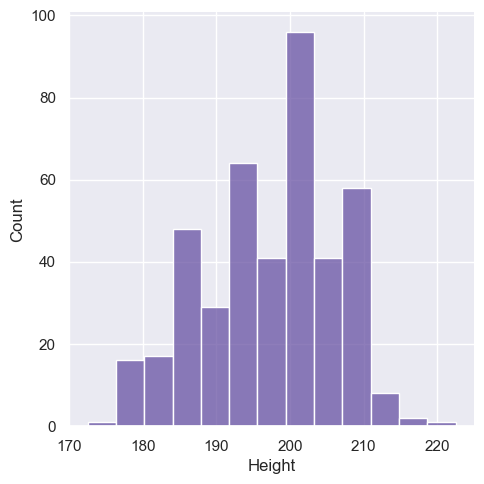

In [ ]:
# Python
sns.displot(x = 'Height', data = nba_stats, color = my_color);

Как во всех командных играх, в баскетболе у каждого игрока есть своя роль и функции. Это определяется его позицией. </br>
Итак, в баскетболе существует 5 позиций:
1. PG - Point Guard (Разыгрывающий защитник)
2. SG - Shooting Guard (Атакующий защитник)
3. SF - Small Forward (Лёгкий форвард)
4. PF - Power Forward (Тяжёлый форвард)
5. C - Center (Центровой)

**Гипотеза**: Существует корреляция между ростом игрока и его позицией на площадке. </br>
Выделим подмножества данных на нашей гистограмме.

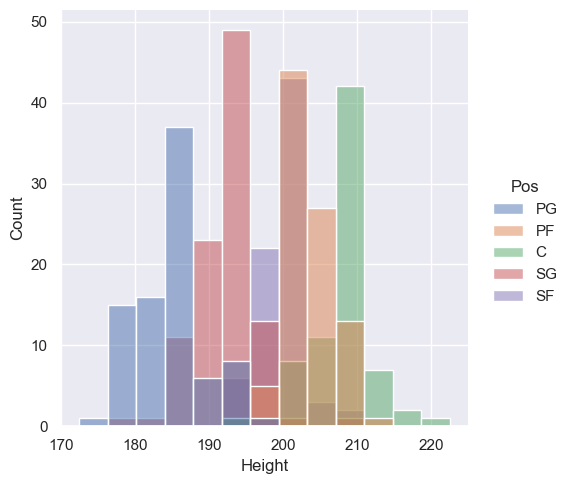

In [ ]:
# Python
sns.displot(x = 'Height', hue = 'Pos', data = nba_stats);

Для того, чтобы показать это более наглядно, отрисуем гистограммы по росту игроков на каждой из позиций отдельно.</br> А также добавим линию, которая будет отражать характер распределения.</br>
</br>

Для этого используется **метод ядерной оценки плотности**.</br></br>

_**Ядерная оценка плотности (Kernel Density Estimation, KDE)** — это непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных._</br></br>


Данный метод уже реализован в библиотечной функции `displot`, необходимо просто включить параметр `kde` в аргументах функции. Но каков его принцип работы?</br>
1. Сначала для каждой точки наблюдений строится график нормального распределения с центром в этой точке.</br>
2. Значения каждой нормальной кривой суммируются, а затем полученное значение нормализуется так, чтобы площадь под результирующей кривой стала равна 1.</br>
3. Полученный график сглаживается в зависимости от выбора **полосы пропускания**.</br>
</br>

_**Полоса пропускания ядра** является свободным параметром, который оказывает сильное влияние на результат оценки._</br></br>
Здесь я использую ту пропускную способность, которую предложил `matplotlib` на основе моих данных, считая такое значение наиболее оптимальным.

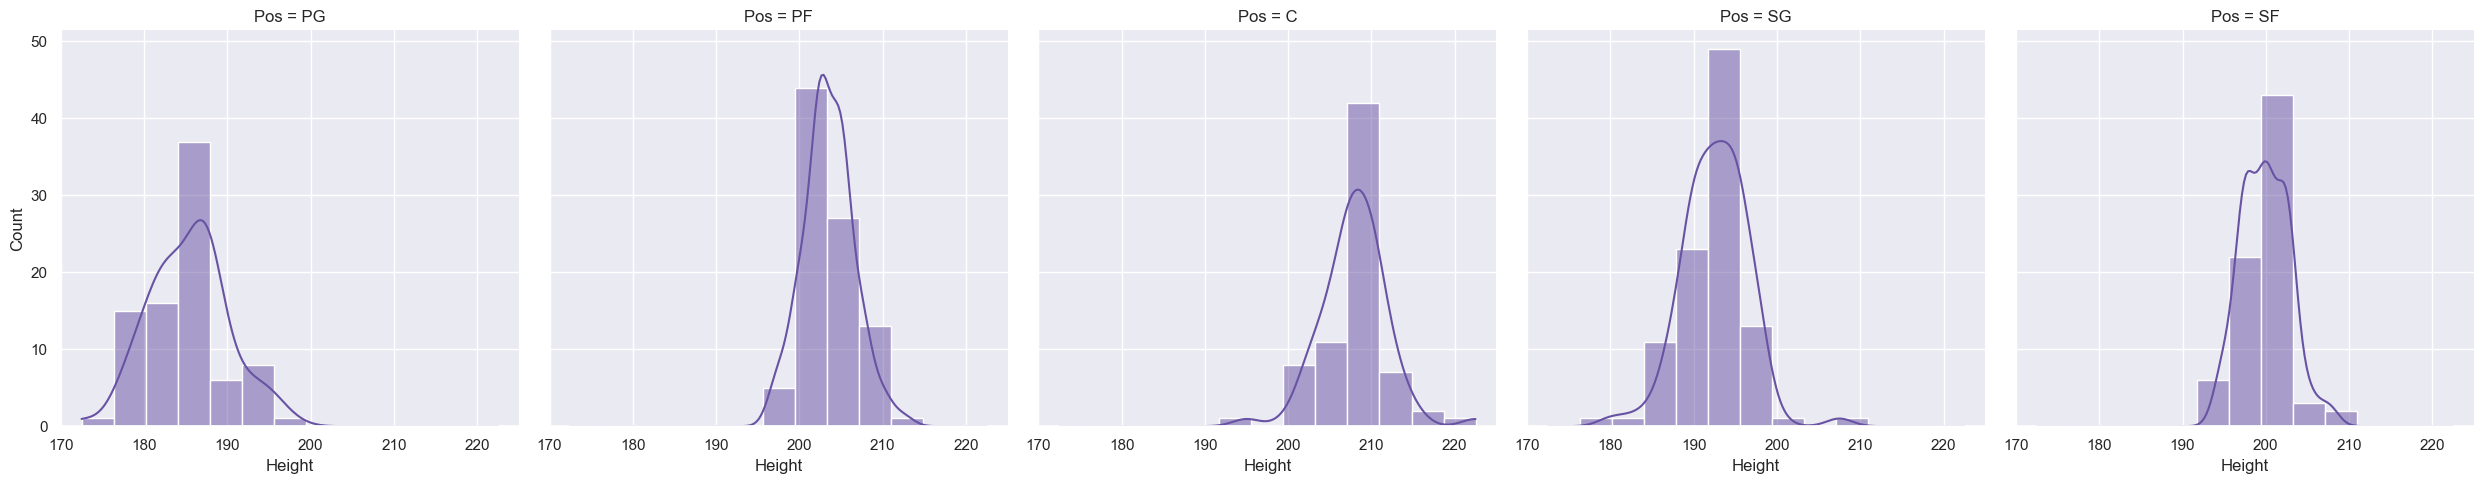

In [ ]:
# Python
sns.displot(x = 'Height', col = 'Pos', kde = True, data = nba_stats, color = my_color);

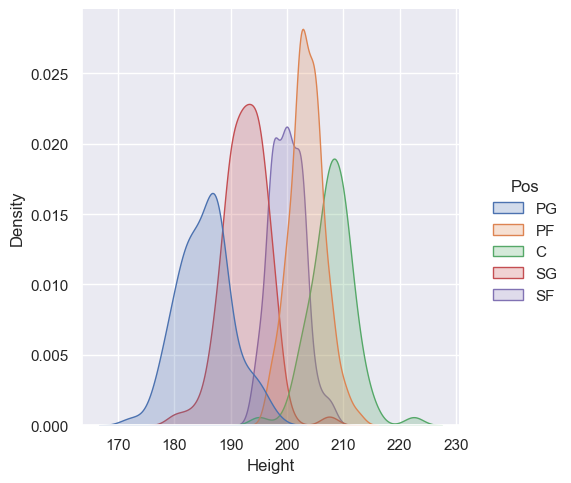

In [ ]:
# Python
sns.displot(x = "Height",
            hue = "Pos",
            kind = "kde",
            fill = True,
            data = nba_stats);

Таким образом, мы убедились в том, что рост игроков распределён в соответсвии с их позициями, тем самым подтвердив гипотезу наглядно.</br>
Действительно, более низкие игроки обычно играют на позиции PG - Point Guard (Разыгрывающий), потому что обладают большой скоростью и манёвренностью.</br>
Высокие же игроки играют на позиции C - Center (Центровой), потому что пользуясь преимуществами своего роста и комплекции, они могут легко зарабатывать очки под кольцом и отлично защищаться.</br></br>

Посмотрим гистограмму с ядерными оценками в R:

In [3]:
# R
# фильтруем таблицу
nba_stats_pg <- filter_data(nba_stats, 'Pos', 'PG')
nba_stats_pg # игроки на позиции Point Guard

data <- nba_stats_pg$Heigh # будем смотреть распределение роста


Name,Games.Played,MIN,PTS,FGM,FGA,FG.,X3PM,X3PA,X3P.,⋯,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
AJ Price,26,324,133,51,137,37.2,15,57,26.3,⋯,29,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.79839
Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,⋯,30,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.36111
Andre Miller,81,1253,355,145,290,50.0,7,34,20.6,⋯,39,us,"March 19, 1976",University of Utah,15,187.5,PG,WAS,90.00,25.60000
Brandon Jennings,41,1173,632,218,543,40.1,76,211,36.0,⋯,26,us,"September 23, 1989",,5,182.5,PG,DET,76.50,22.96866
Brian Roberts,72,1330,480,176,452,38.9,62,193,32.1,⋯,30,us,"December 3, 1985",University of Dayton,2,182.5,PG,CHA,77.85,23.37399
Bryce Cotton,15,159,80,29,69,42.0,7,20,35.0,⋯,23,us,"August 11, 1992",Providence College,R,182.5,PG,UTA,74.25,22.29311
C.J. Watson,57,1422,570,181,417,43.4,70,175,40.0,⋯,31,us,"April 17, 1984",University of Tennessee,7,185.0,PG,IND,78.75,23.00950
Chris Paul,82,2857,1564,568,1170,48.5,139,349,39.8,⋯,30,us,"May 6, 1985",Wake Forest University,9,180.0,PG,LAC,78.75,24.30556
Cory Joseph,79,1444,535,207,411,50.4,16,44,36.4,⋯,24,ca,"August 20, 1991",University of Texas at Austin,3,187.5,PG,SAS,86.85,24.70400


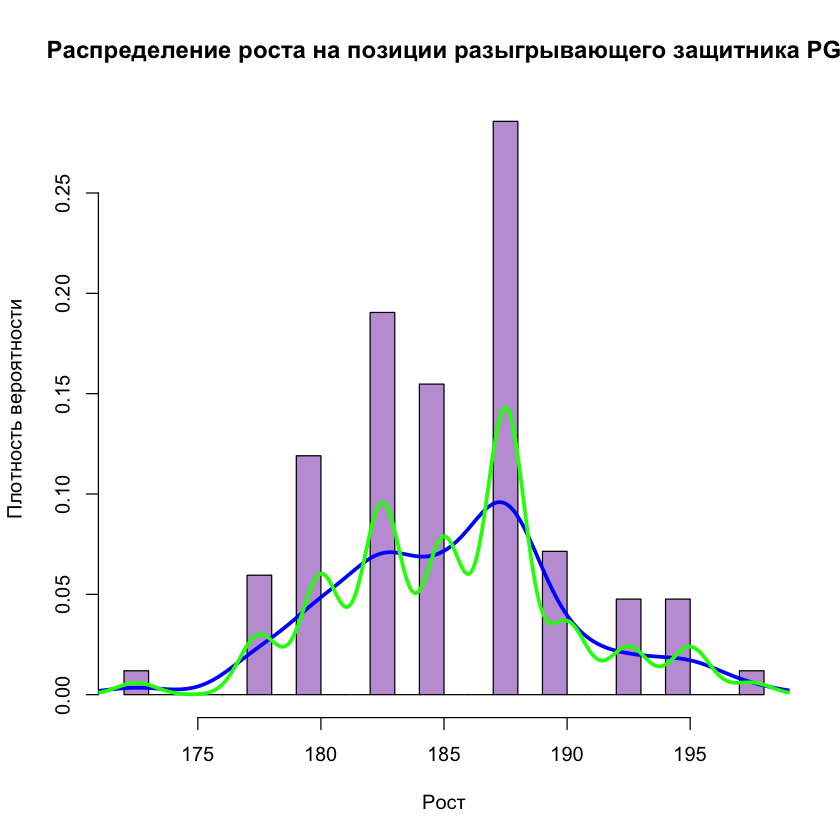

In [4]:
# R
# Строим гистограмму и ядерные оценки
hist(data, breaks = 20, freq = FALSE, col = rgb(0.5, 0.2, 0.7, 0.5),
     xlab = "Рост",
     ylab = "Плотность вероятности",
     main = "Распределение роста на позиции разыгрывающего защитника PG")
lines(density(data), col = "blue", lwd = 3)
lines(density(data, bw = 0.8), col = "green", lwd = 3)

Вообще, позиция игрока являеется очень хорошей качественной переменной (фактором), потому что позволяет отследить много зависимостей. Поэтому в последующих заданиях будет часто использоваться.

<span style="color:#6852A3">
<h2>
2. Анализ данных с помощью cdplot, dotchart, boxplot, stripchart.
</h2>
</span>

**<span style="color:#410083">
cdplot:
</span>**

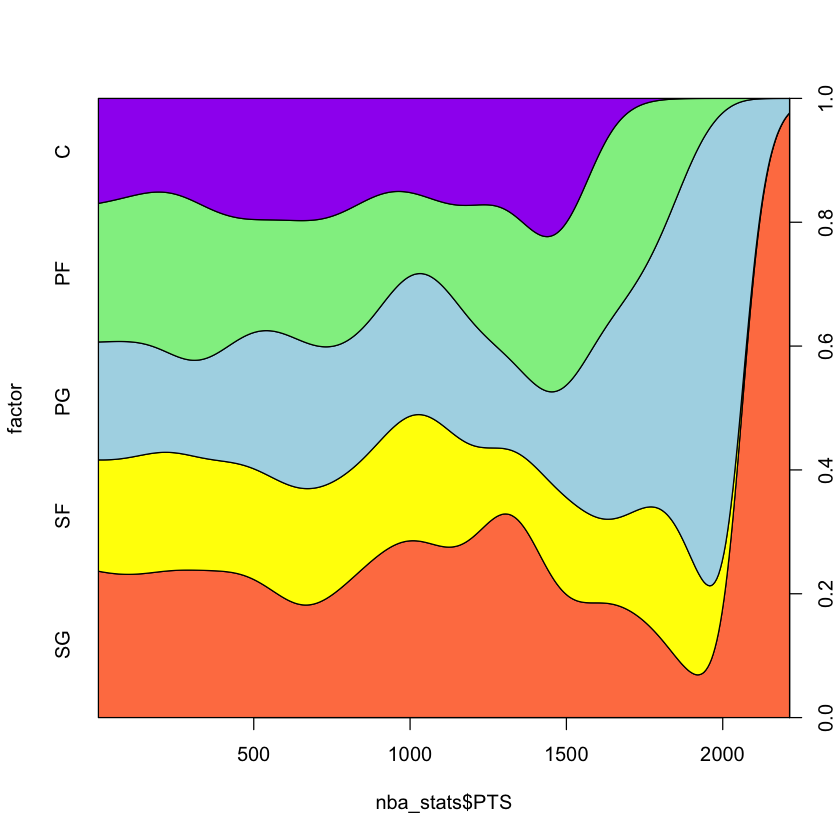

In [5]:
# R
# Распределние по количеству очков у игроков разных позиций

nba_stats$factor <- factor(nba_stats$Pos)

cdplot(factor ~ nba_stats$PTS, col = c("coral", "yellow", "lightblue", "lightgreen", "purple"), data = nba_stats)

Для визуализации связи между двумя переменными, одна из которых является количественной, а другая качественной (фактором), можно использовать диаграмму размахов.  Если зависимой является качественная переменная, то удобно воспользоваться одной из базовых графических функций R - `cdplot()`, позволяющей совмещать на одном графике плотности вероятности для каждого уровня интересующей исследователя качественной переменной (англ. conditional density plot).

Аналогом этой функции в Python служит всё та же функция `displot()` из библиотеки `seaborn`, которую мы уже использовали ранее при работе с ядерными оценками. Теперь же добавляем параметр `multiple = "fill"`, чтобы видеть график именно в том виде, который строит `cdplot()`.

Давайте посмотрим на то, игроки каких позиций больше очков приносят команде. Для этого обратимся к таблице `NBA SEASONS` и рассмотрим игры за 2017 год. </br>
На графике отражаю распределение по количеству набранных очков игроками с разных позиций.

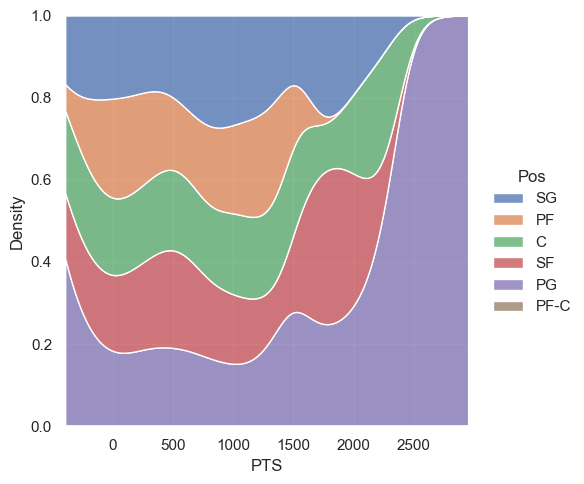

In [ ]:
# Python
sns.displot(data = nba_seasons[nba_seasons['Year']==2017], hue = "Pos", multiple = "fill", x = "PTS", kind = "kde");

Сильно выделяются игроки разыгрывающей позиции (PG). Если кто и зарабатывает отличительно большое количество очков - это именно они. </br>
Игроки остальных позиций в среднем зарабатывают одинаковое количество очков.

**Примечание**: графики на R и Python рассматривают разные данные, но характер распределения одинаков и подтверждает гипотезу.

**<span style="color:#410083">
dotchart:
</span>**

**Точечный график** как представление распределения состоит из группы точек данных, нанесенных на простой масштаб. Точечные диаграммы используются для непрерывных , количественных , одномерных данных.
Точечные графики - это один из простейших статистических графиков, который подходит для небольших и средних наборов данных. Они полезны для выделения кластеров и пробелов, а также выбросов . Другое их преимущество - сохранение числовой информации. При работе с большими наборами данных (около 20–30 или более точек данных) связанный стержневой график , прямоугольная диаграмма или гистограмма могут быть более эффективными, так как точечные графики после этого момента могут стать слишком загроможденными. Точечные графики можно отличить от гистограмм тем, что точки не расположены равномерно по горизонтальной оси.

Хотя сюжет кажется простым, его расчет и лежащая в его основе статистическая теория непросты. Алгоритм вычисления точечной диаграммы тесно связан с оценкой плотности ядра . Выбранный размер точек влияет на внешний вид сюжета. Выбор размера точки эквивалентен выбору полосы пропускания для оценки плотности ядра.



В R это реализуется с помощью функции `dotchart()`, в Python аналогичный график строится при помощи функции `scatter()`.

Итак, нам нужно небольшое количество данных. Рассмотрим игровые показатели команды Golden State Warriors (GSW) за игровой сезон 2017 года и отметим на точечном графике количество реализованных двухочковых бросков (2P) у различных игроков.

In [ ]:
# Python
gsw_2017 = nba_seasons[nba_seasons['Year']==2017][nba_seasons['Tm']=='GSW']
import plotly.express as px
fig = px.scatter(gsw_2017, y = "Player", x = "2P", height=600, color = "Pos")
fig.update_yaxes(type='category', tickvals=gsw_2017['Player'].tolist())
fig.show()

**<span style="color:#410083">
boxtplot:
</span>**

**Диаграммы размаха («ящик с усами») (Box and Whisker Plot или Box Plot)** – это удобный способ визуального представления групп числовых данных через квартили.

Прямые линии, исходящие из ящика, называются «усами» и используются для обозначения степени разброса (дисперсии) за пределами верхнего и нижнего квартилей. Выбросы иногда отображаются в виде отдельных точек, находящихся на одной линии с усами. Диаграммы размаха могут располагаться как горизонтально, так и вертикально.

Диаграммы размаха, как правило, используются в описательной статистике и позволяют быстро исследовать один или более наборов данных в графическом виде. Несмотря на то, что в сравнении с гистограммой или графиком плотности, этот график может показаться примитивным, его преимущество – в экономии пространства, что особенно удобно при сравнении распределений между большим количеством групп или наборов данных.

Виды наблюдений, которые можно сделать на основе ящика с усами:

- Каковы ключевые значения, например: средний показатель, медиана 25го перцентиля и так далее.

- Существуют ли выбросы и каковы их значения.

- Cимметричны ли данные.

- Насколько плотно сгруппированы данные.

- Смещены ли данные и, если да, то в каком направлении.


<p align="center"><img
 src = "/Users/mazur/Desktop/PRAK_5sem/box_plot.svg"
 alt= "drawing"
 width= "400"
/></p>



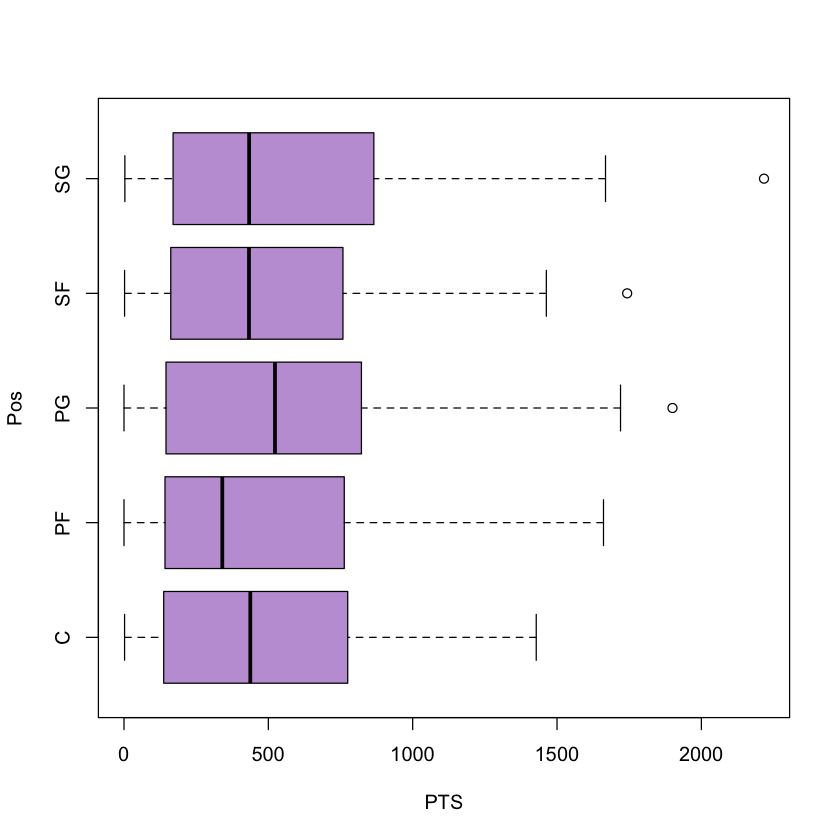

In [15]:
# R
boxplot(PTS ~ Pos,
        col = rgb(0.5, 0.2, 0.7, 0.5), 
        data = nba_stats, horizontal=TRUE)

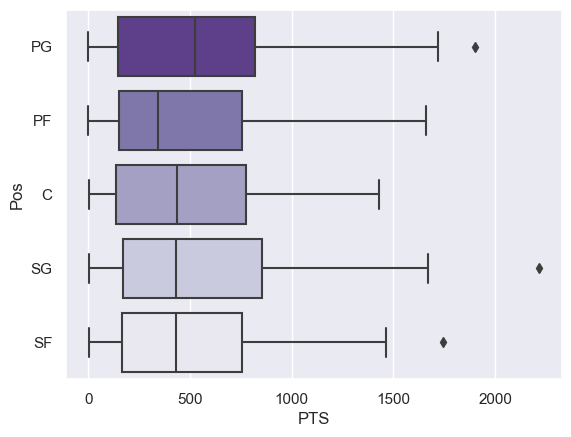

In [ ]:
# Python
sns.boxplot(data = nba_stats, y = "Pos", x = "PTS", palette="Purples_r");

Из данного графика видно, что медианное значение количества забитых трёхочковых бросков у игроков разыгрывающей позиции (PG) заметно больше, чем у других игроков. Размах в целом примерно одинаков. Случаются выбросы.

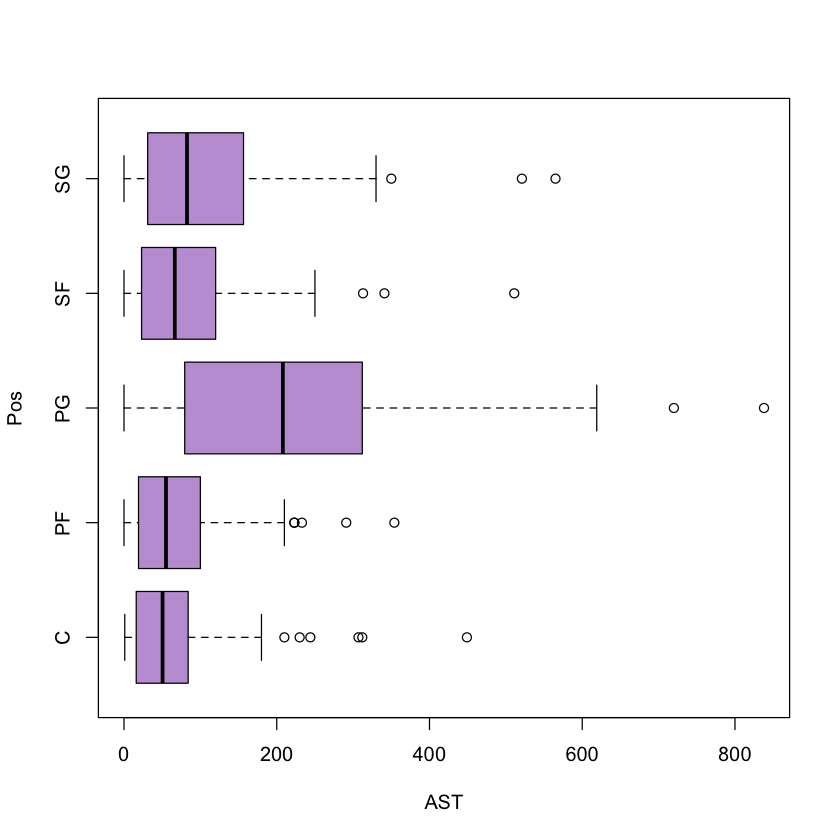

In [14]:
# R
boxplot(AST ~ Pos,
        col = rgb(0.5, 0.2, 0.7, 0.5), 
        data = nba_stats, horizontal=TRUE)

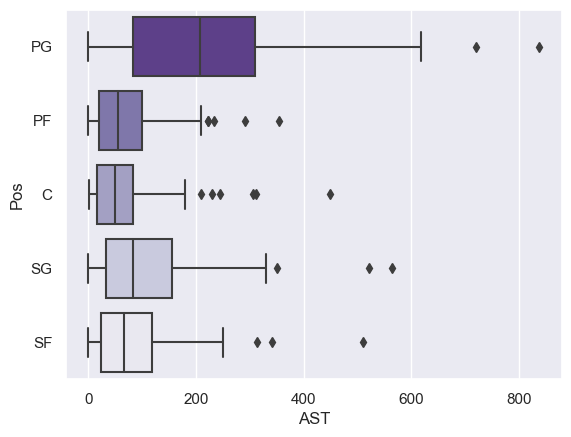

In [ ]:
# Python
sns.boxplot(data = nba_stats, y = "Pos", x = "AST", palette="Purples_r");

На данном графике рассмотрели количество результативных передач (Assists). У разыгрывающих их принципиально больше: больше медианное значение и сам размах в целом шире. Игроки других позиций пасуют сильно меньше.

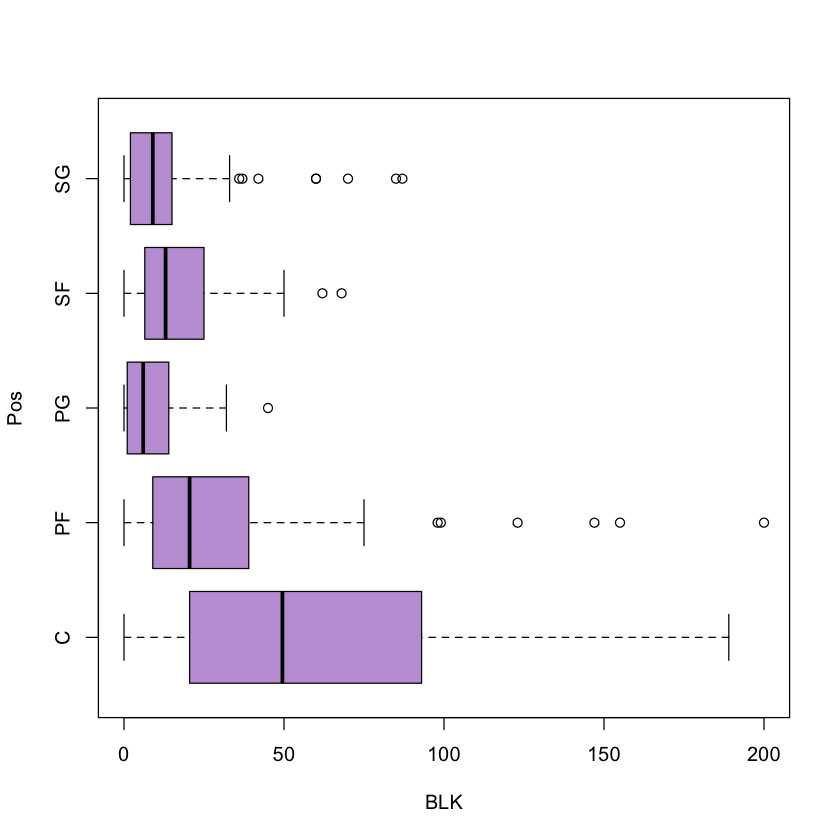

In [13]:
# R
boxplot(BLK ~ Pos,
        col = rgb(0.5, 0.2, 0.7, 0.5),
        data = nba_stats, horizontal=TRUE)

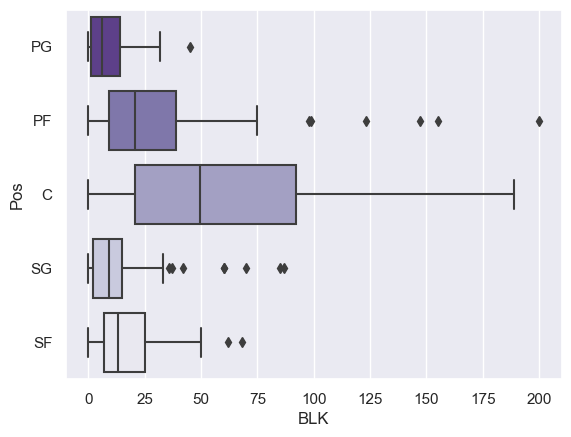

In [ ]:
# Python
sns.boxplot(data = nba_stats, y = "Pos", x = "BLK", palette="Purples_r");

На этом графике рассмотрим действия игроков в защите - блокшот, то есть ситуация, когда игрок блокирует бросок соперника.</br>
Легко заметить, что центровые игроки выделяются. Блогадаря высокому росту и габаритам, этот приём даётся им лучше всего и они активно его практикуют.
</br></br>
Выбросы тоже случаются, но всё же общая картина даёт понять, что центровые игроки занимают лидирующие места по этому показателю.


**<span style="color:#410083">
stripchart:
</span>**

В языке R функция `stripchart()` отвечает за построение одномерных диаграмм рассеяния. **Диаграмма рассеяния** показывает взаимосвязь между двумя числовыми признаками с помощью точек, показывающих движение этих переменных вместе. </br>
В языке Python такую диаграмму мы можем реализовать с помощью функции `stripplot()`.

На данном графике я отразила количество успешных трёхочковых бросков (каждая отдельная точка - сумма по всем игрокам за сезон) c течением времени.</br></br>

Окунёмся в историю: раньше в баскетболе не практиковались броски с дальних дистанций. Со временем стиль игры менялся и пришла идея ввести трёхочковый бросок в игру. В профессиональный баскетбол трёхочковый бросок проник только в начале 1960-х годов, впервые появившись в 1961 году в правилах Американской баскетбольной лиги. Наконец, в сезоне 1979/80 правило о трёхочковых бросках было принято и в НБА.</br></br>

Именно поэтому на графике до 1979 года совсем нет никаких точек - трёхочковые броски попросту не практиковали или же не трактовали таким образом, потому что данной категории не было в правилах.</br>
Затем дальний бросок стал набирать всё большую популярность. На графике мы можем видеть, что тренд растёт.

In [115]:
# Python
nba_3pt = pd.read_csv("/Users/mazur/Desktop/PRAK_5sem/nba/3pt.csv") # вспомогательная таблица, где просто записана сумма количества трёхочковых бросков за каждый год

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

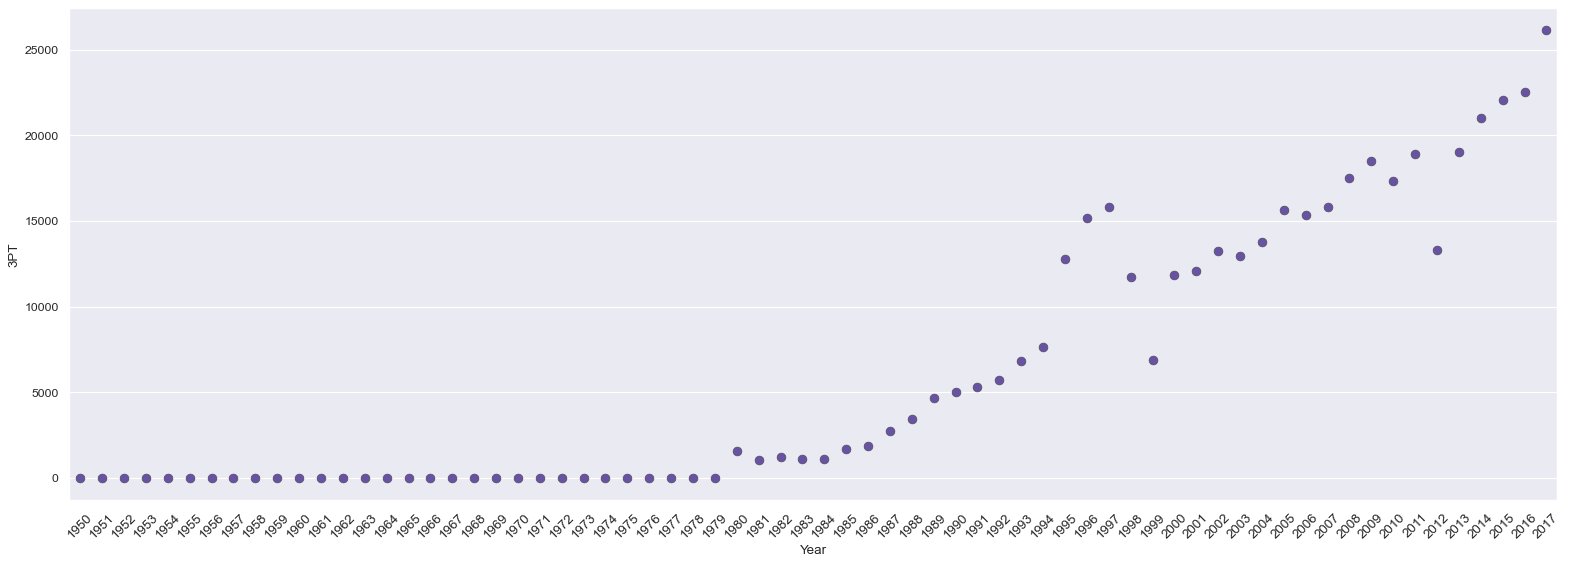

In [ ]:
# Python
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(nba_3pt, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

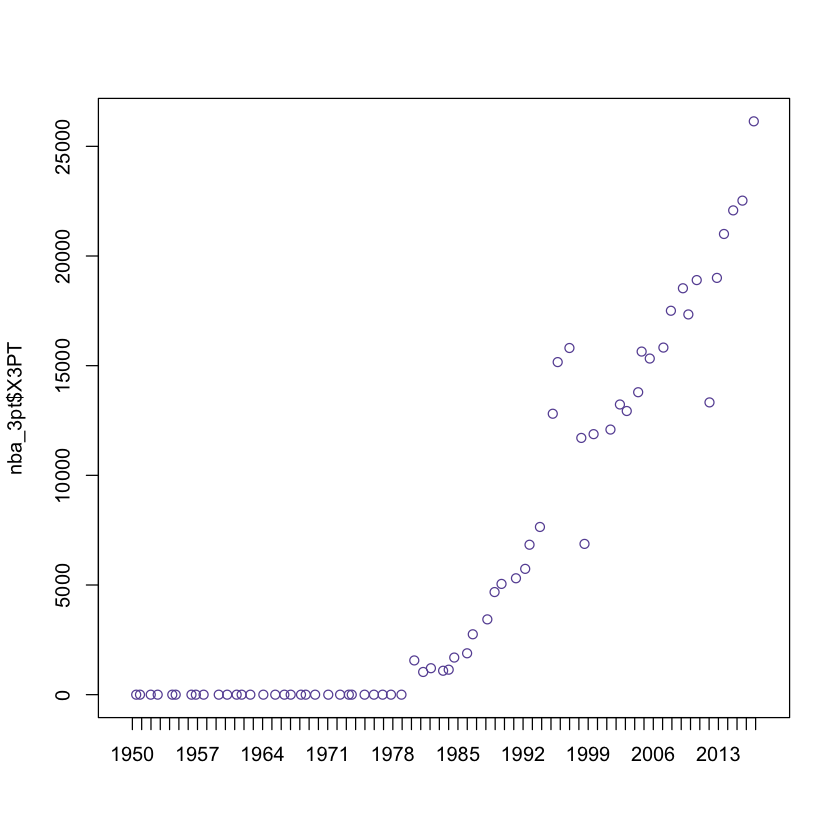

In [10]:
# R
nba_3pt <- read.csv(file = "/Users/mazur/Desktop/PRAK_5sem/nba/3pt.csv", header = TRUE)
nba_3pt <- na.omit(nba_3pt)

stripchart(nba_3pt$X3PT ~ nba_3pt$Year,
           method = "jitter",
           jitter = 0.45,
           pch = 1, col = '#6852A3', vertical = TRUE)

<span style="color:#6852A3">
<h2>

3. Проверка, являются ли наблюдения выбросами с точки зрения формальных  статистических  критериев  Граббса  и  Q-теста  Диксона. Визуализация результатов. 

</h2>
</span>

**Тесты Граббса и Диксона** используется для определения наличия выбросов в наборе данных.
<br> Предлагаю посмотреть, у кого из игроков рекордные показатели по количеству успешно-реализованных трёхочковых бросков таким образом.

**<span style="color:#410083">
Тест Граббса
</span>**

In [ ]:
# Python
import smirnov_grubbs as grubbs

#perform Grubbs' test to see if minimum value is an outlier
grubbs. max_test_indices (nba_stats['3PM'], alpha=.05)

[433, 281]

Тест Граббса нашел 2 выброса: 433 запись и 281 запись в моей таблице. Посмотрим, что за игрок находится под 433 индексом в таблице:

In [ ]:
# Python
print(nba_stats.at[433, 'Name'])

Stephen Curry


Теперь проведём тест Граббса с помощью языка R:

In [34]:
# R
data <- nba_stats$X3PM[1:500]
grubbs.test(data)


	Grubbs test for one outlier

data:  data
G = 4.94697, U = 0.94173, p-value = 0.0001099
alternative hypothesis: highest value 286 is an outlier


Тест Граббса сообщает, что значение выброса = 286. Давайте посмотрим, у какого игрока такое значение в соответсвующем столбце.

In [46]:
nba_stats$Name[nba_stats$X3PM == 286]

[1] "Stephen Curry"

**<span style="color:#410083">
Тест Диксона
</span>**

**Примечание:** Тест Диксона реализован в качестве функции только на языке R. Поэтому решение на языке Python для этого пункта не приводится.

Для теста Диксона существуют ограничение - он может обрабатывать только 30 записей. Поэтому искуственно "подскажем" алгоритму, где именно стоит искать выброс. В этой таблице Stephen Curry находится на 374 строке, поэтому укажу такой интервал, где он точно будет.

In [47]:
# R
data <- nba_stats$X3PM[370:390]
dixon.test(data)


	Dixon test for outliers

data:  data
Q = 0.57692, p-value = 0.0003989
alternative hypothesis: highest value 286 is an outlier


Тест Диксона также сообщает, что выбросное значение = 286. А это игрок Stephen Curry.

Здесь мы посмотрели тесты Граббса и Диксона для максимального значения по количеству реализованных трёхочковых бросков. Выбросом оказался игрок Стефен Карри, который действительно является рекордсменом по числу дальних бросков.

<span style="color:#6852A3">
<h2>

4. Инструменты для  заполнения  пропусков  в данных.  Сравнение  результатов заполнения  с истинными значениями. 
   
</h1>
</span>

В одном из предыдущих заданий мы убедились в том, что существует тенденция роста дальних бросков. И она практические линейная. </br>
Поэтому в этом задании я хочу поработать с этими данными. Для этого возьмём последние 37 содержательных строк таблицы.

In [ ]:
# Python
df = nba_3pt.tail(37)
df

,Year,3PT
31,1981,1035.0
32,1982,1206.0
33,1983,1091.0
34,1984,1139.0
35,1985,1692.0
36,1986,1886.0
37,1987,2753.0
38,1988,3433.0
39,1989,4678.0
40,1990,5050.0


In [ ]:
# Python
print(df['Year'][36], ',', df['3PT'][36])
print(df['Year'][42], ',', df['3PT'][42])
print(df['Year'][51], ',', df['3PT'][51])
print(df['Year'][65], ',', df['3PT'][65])

1986 , 1886.0
1992 , 5736.0
2001 , 12087.0
2015 , 22080.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

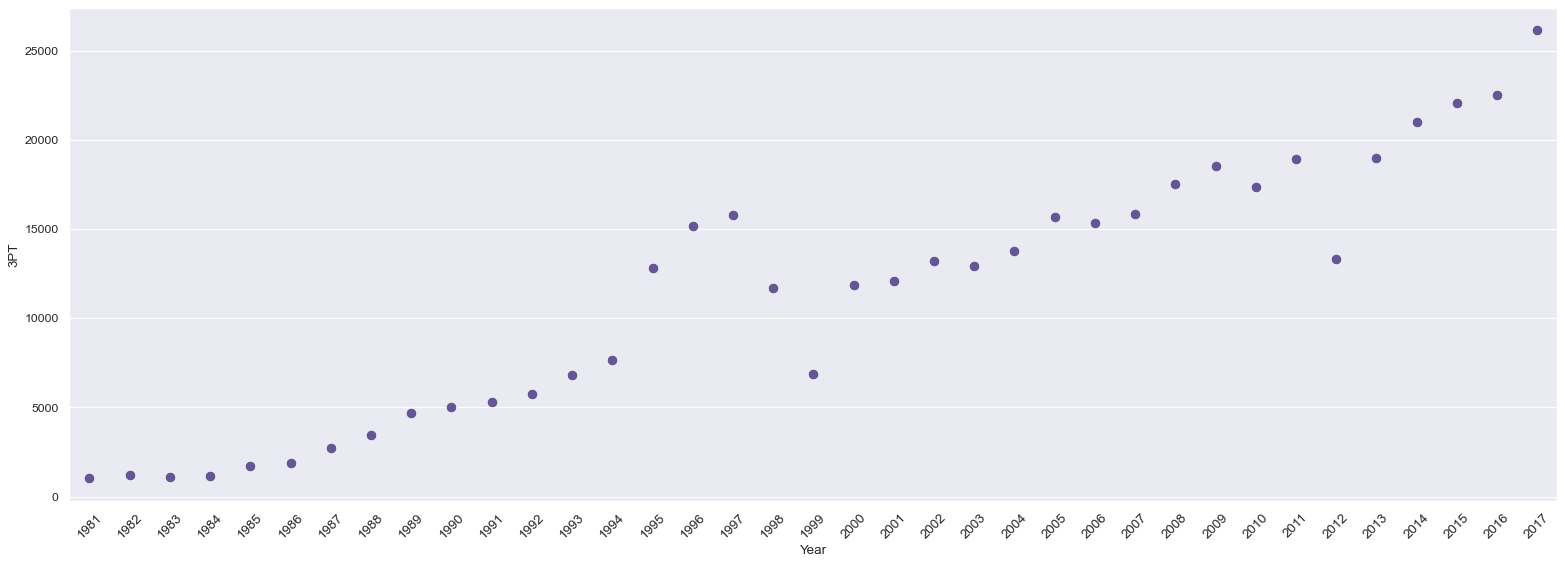

In [ ]:
# Python
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(df, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

Удалим некоторые строки.

In [116]:
# Python
df['3PT'][36] = np.nan
df['3PT'][42] = np.nan
df['3PT'][51] = np.nan
df['3PT'][65] = np.nan

df['3PT'].isna().sum() # проверка на наличие пропусков

4

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

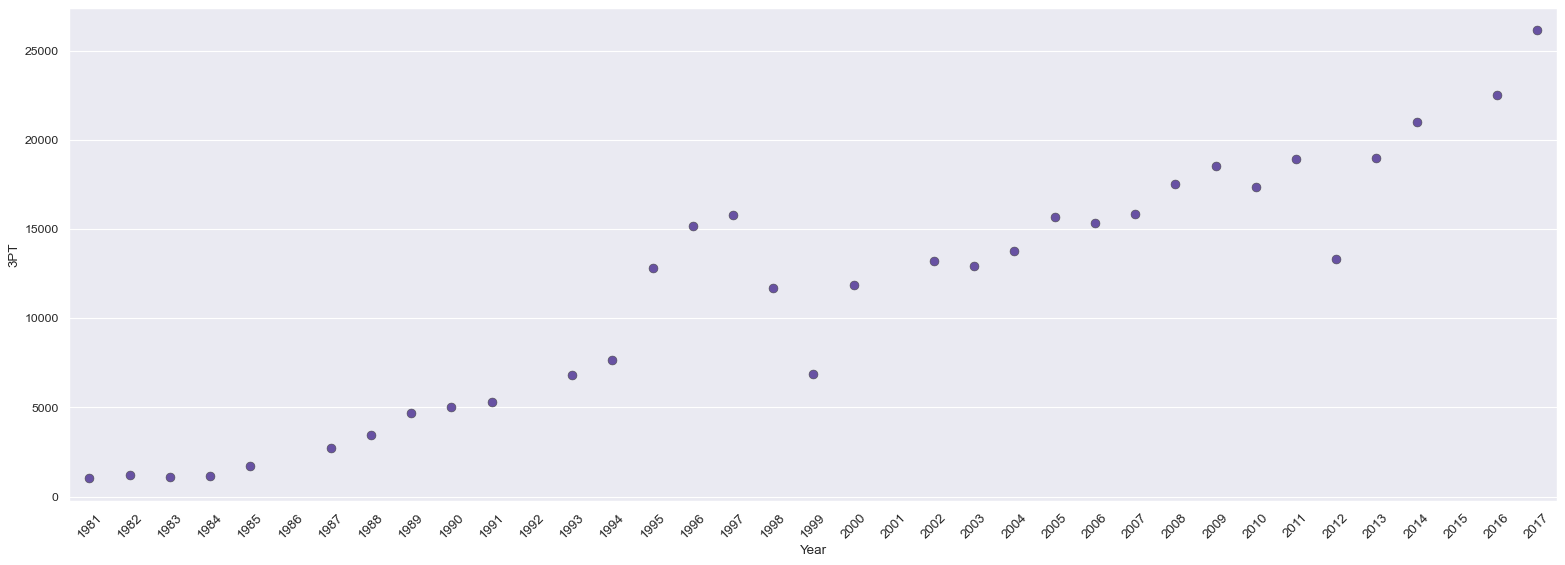

In [117]:
# Python
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(df, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

В такой ситуации пропуски лучше заполнять средним по соседним двум значениям.

In [ ]:
# Python
df['3PT'][36] = (df['3PT'][35] + df['3PT'][37]) / 2
df['3PT'][42] = (df['3PT'][41] + df['3PT'][43]) / 2
df['3PT'][51] = (df['3PT'][50] + df['3PT'][52])/ 2
df['3PT'][65] = (df['3PT'][64] + df['3PT'][66]) / 2

In [ ]:
# Python
print(df['Year'][36], ',', df['3PT'][36])
print(df['Year'][42], ',', df['3PT'][42])
print(df['Year'][51], ',', df['3PT'][51])
print(df['Year'][65], ',', df['3PT'][65])

1986 , 2222.5
1992 , 6071.5
2001 , 12554.0
2015 , 21764.5


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

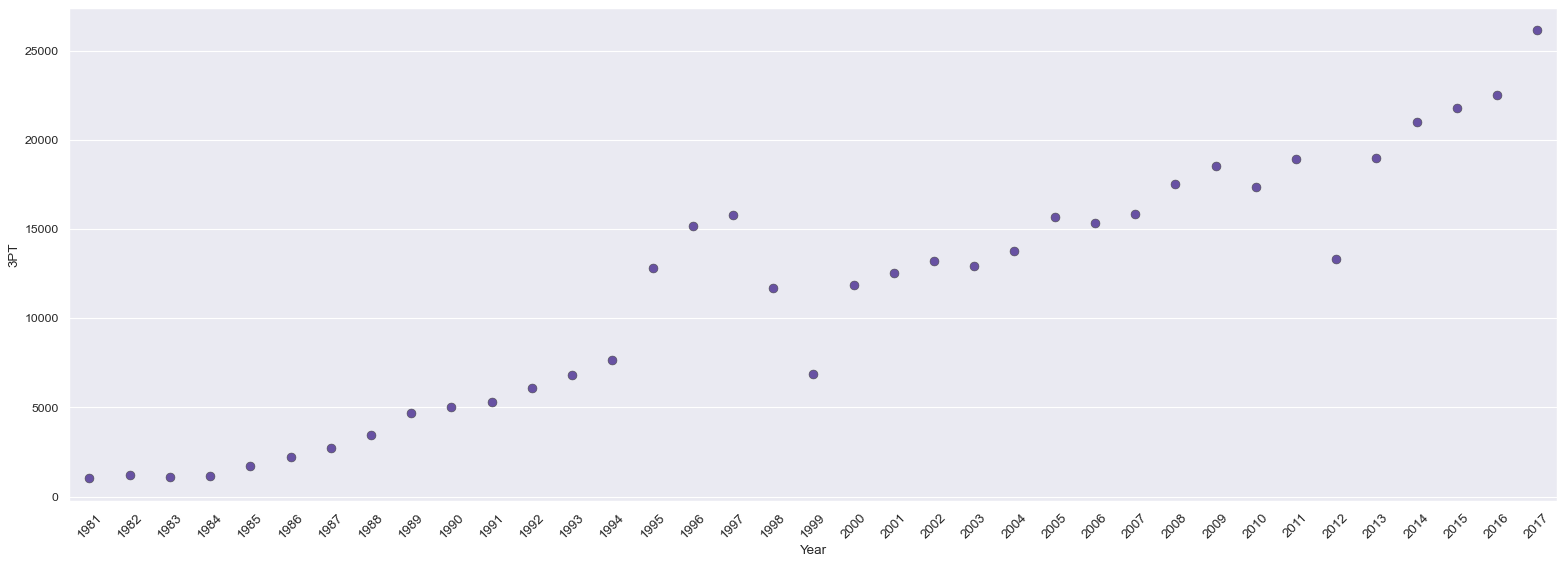

In [ ]:
# Python
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(df, y = '3PT', x = "Year", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

Рассмотрим какое-нибудь распределение, похожее на нормальное. В первом задании мы работали с распределнием роста игроков на разных позициях. Воспользуемся этими данными.

In [ ]:
# Python
nba_stats_c = nba_stats[nba_stats['Pos']=='C']
nba_stats_c

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
5,Al Jefferson,65,1992,1082,486,1010,48.1,2,5,40.0,...,30.0,us,"January 4, 1985",NaN,10,205.0,C,CHA,130.05,30.945866
8,Alex Kirk,5,14,4,1,4,25.0,0,0,0.0,...,24.0,us,"November 14, 1991",University of New Mexico,R,210.0,C,CLE,110.25,25.000000
9,Alex Len,69,1518,432,179,353,50.7,1,3,33.3,...,22.0,ua,"June 16, 1993",University of Maryland,1,212.5,C,PHO,117.00,25.910035
11,Alexis Ajinca,68,957,443,181,329,55.0,0,0,0.0,...,27.0,fr,"May 6, 1988",NaN,4,215.0,C,NOH,111.60,24.142780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,Tiago Splitter,52,1030,428,169,303,55.8,0,0,0.0,...,30.0,br,"January 1, 1985",NaN,4,207.5,C,SAS,110.25,25.606039
446,Tim Duncan,77,2227,1070,419,819,51.2,2,7,28.6,...,39.0,vi,"April 25, 1976",Wake Forest University,17,207.5,C,SAS,112.50,26.128611
449,Timofey Mozgov,81,2046,785,314,566,55.5,2,6,33.3,...,29.0,ru,"July 16, 1986",NaN,4,212.5,C,CLE,123.75,27.404844
471,Tyson Chandler,75,2286,771,293,440,66.6,0,0,0.0,...,33.0,us,"October 2, 1982",NaN,13,212.5,C,DAL,108.00,23.916955


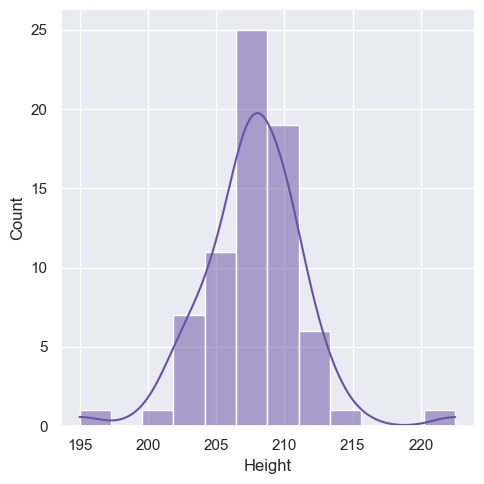

In [118]:
# Python
sns.displot(x = 'Height', data = nba_stats_c, kde = True, color = my_color);

In [ ]:
# Python
print(nba_stats_c['Height'][446])
print(nba_stats_c['Height'][11])
print(nba_stats_c['Height'][8])
print(nba_stats_c['Height'][471])

207.5
215.0
210.0
212.5


In [ ]:
# Python
nba_stats_c['Height'][446] = np.nan
nba_stats_c['Height'][11] = np.nan
nba_stats_c['Height'][8] = np.nan
nba_stats_c['Height'][471] = np.nan


nba_stats_c['Height'].isna().sum() # проверка количества пропусков


4

In [ ]:
# Python
nba_stats_c['Height'][446] = nba_stats_c.mean()['Height']
nba_stats_c['Height'][11] = nba_stats_c.mean()['Height']
nba_stats_c['Height'][8] = nba_stats_c.mean()['Height']
nba_stats_c['Height'][471] = nba_stats_c.mean()['Height']

print(nba_stats_c.mean()['Height'])

207.75735294117646


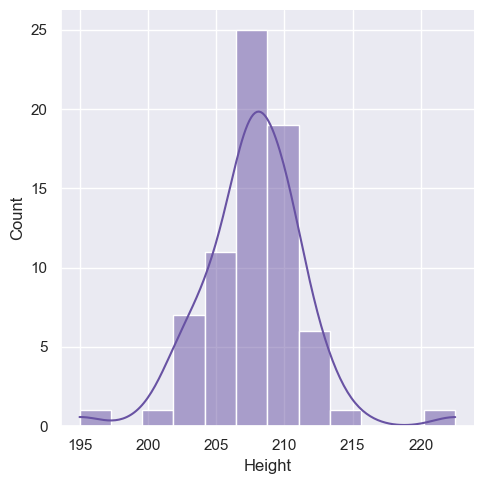

In [ ]:
# Python
sns.displot(x = 'Height', data = nba_stats_c, kde = True, color = my_color);

In [ ]:
# Python
nba_stats_c['Height'][446] = nba_stats_c.median()['Height']
nba_stats_c['Height'][11] = nba_stats_c.median()['Height']
nba_stats_c['Height'][8] = nba_stats_c.median()['Height']
nba_stats_c['Height'][471] = nba_stats_c.median()['Height']

print(nba_stats_c.median()['Height'])

207.5


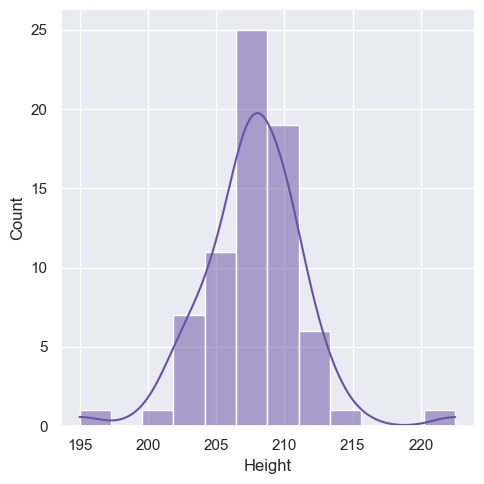

In [ ]:
# Python
sns.displot(x = 'Height', data = nba_stats_c, kde = True, color = my_color);

Можно сделать вывод о том, что методы заполнения медианными и средними значениями в целом дают довольно близкие результаты.

Проделаем те же действия на R:

In [49]:
# R
nba_stats_c <- filter_data(nba_stats, 'Pos', 'C')
data <- nba_stats_c$Height


# Примечание: в данной таблице другая нумерация, так как удалены пробелы. Поэтому удалю другие значения
nba_stats_c$Height[68]
nba_stats_c$Height[11]
nba_stats_c$Height[8]
nba_stats_c$Height[45]

#Удаляю
nba_stats_c$Height[68] <- NA
nba_stats_c$Height[11] <- NA
nba_stats_c$Height[8] <- NA
nba_stats_c$Height[45] <- NA

data <- mice(nba_stats_c, seed = 31600)
data1 <- complete(data, action = 3)

data1$Height[68]
data1$Height[11]
data1$Height[8]
data1$Height[45]

[1] 207.5

[1] 205

[1] 210

[1] 202.5


 iter imp variable
  1   1  Height*
  1   2  Height*
  1   3  Height*
  1   4  Height*
  1   5  Height*
  2   1  Height*
  2   2  Height*
  2   3  Height*
  2   4  Height*
  2   5  Height*
  3   1  Height*
  3   2  Height*
  3   3  Height*
  3   4  Height*
  3   5  Height*
  4   1  Height*
  4   2  Height*
  4   3  Height*
  4   4  Height*
  4   5  Height*
  5   1  Height*
  5   2  Height*
  5   3  Height*
  5   4  Height*
  5   5  Height*


[1] 202.5

[1] 207.5

[1] 195

[1] 202.5

<span style="color:#6852A3">
<h2>

5. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью 
   - графиков эмпирических функций распределений, 
   - квантилей, 
   - метода огибающих, 
   - а также стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова,Шапиро-Уилка,Андерсона-Дарлинга,Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). 

</h2>
</span>


In [ ]:
# Python
data1 = np.random.normal(0, 2, size = 50)
data2 = np.random.normal(0, 1, size = 50)
data3 = np.random.normal(1, 4, size = 5000)
data4 = np.random.normal(11, 3, size = 5000)
data5 = np.random.normal(1, 1, size = 1000)

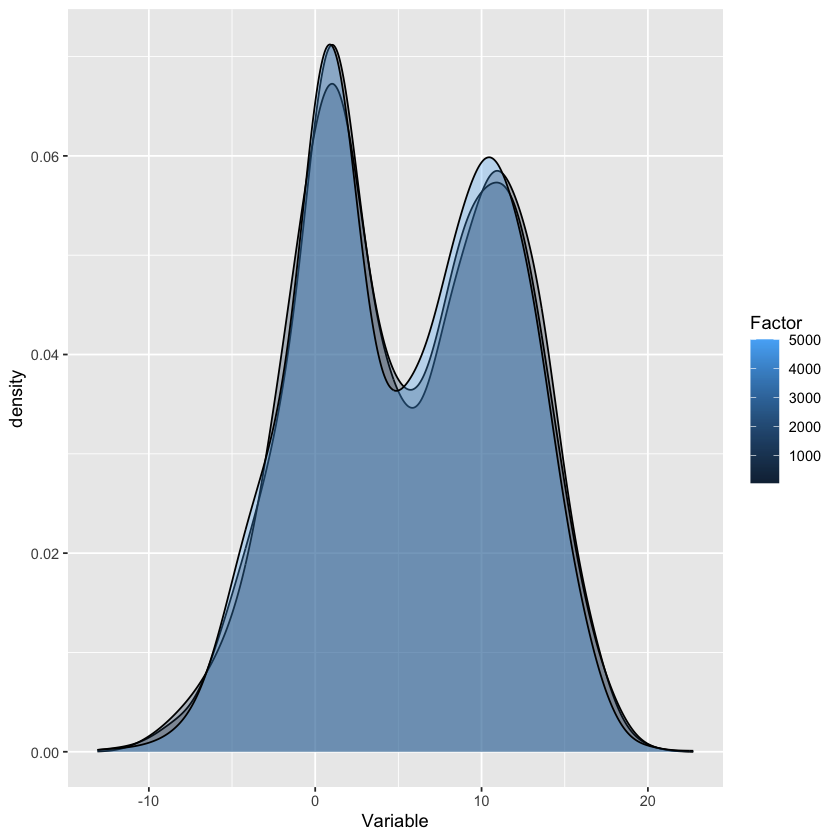

In [22]:
# R
data1 <- rnorm(50, 0, 2)
data2 <- rnorm(50, 0, 1)

data3 <- rnorm(5000, 1, 4)
data4 <- rnorm(5000, 11, 3)

data5 <- rnorm(1000, 1, 1)


library(ggplot2)

norm_vec = data.frame(Factor = rep(c(50, 50,5000, 5000, 1000)),
                                   Variable = c(data1, data2, data3, data4, data5))
ggplot(norm_vec, aes(Variable, group = Factor, fill = Factor)) +
  geom_density(alpha = 0.3)

graph_distr <- function(x, pc, main_name = "")
{ 
  plot(x,pc, type = "l", col = rgb(0.5, 0.2, 0.7, 0.5), lwd = 2) 
  plot(ecdf(x), add = TRUE) 
}

**<span style="color:#410083">
Эмпирические функции распределения:
</span>**

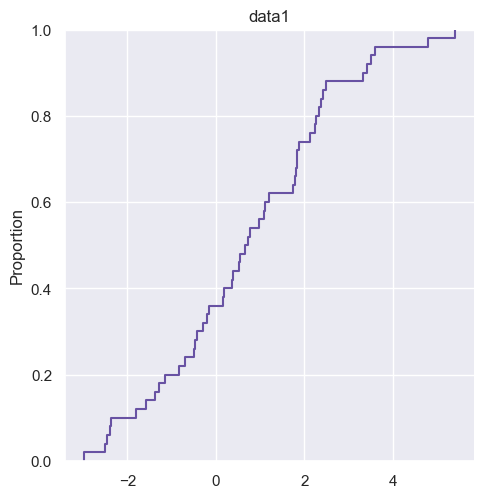

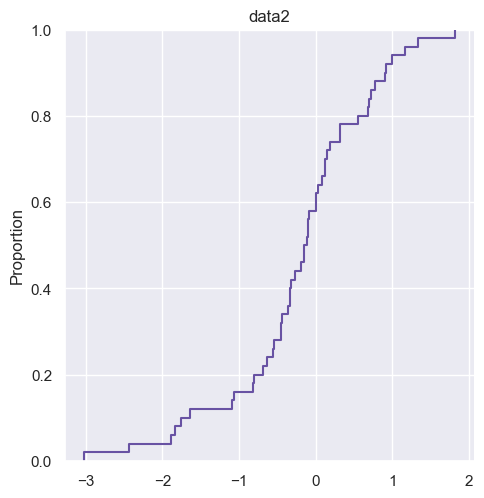

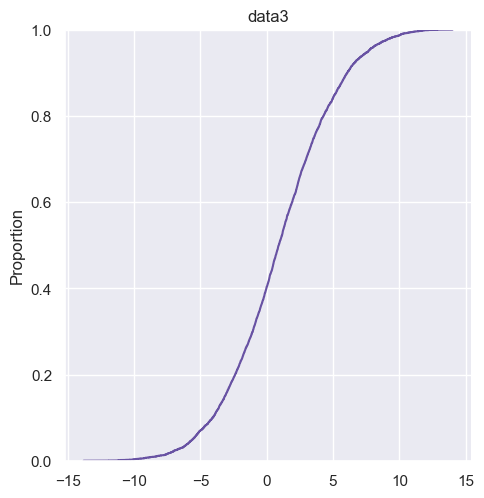

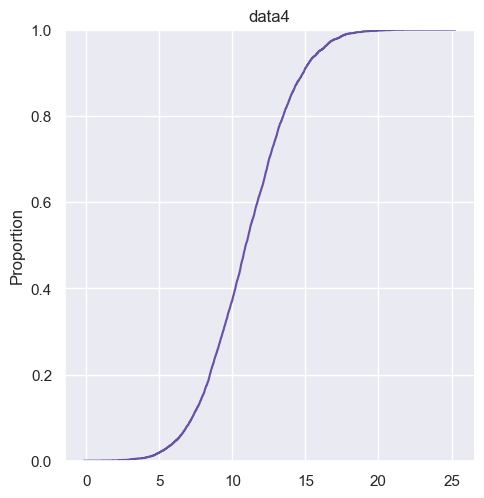

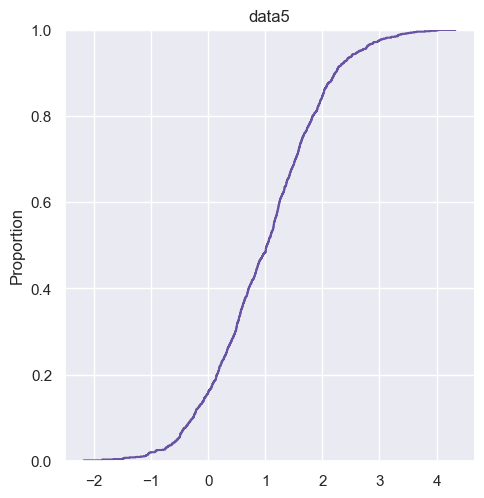

In [138]:
# Python
sns.displot(data = data1, kind = "ecdf", color = my_color).set(title='data1');
sns.displot(data = data2, kind = "ecdf", color = my_color).set(title='data2');
sns.displot(data = data3, kind = "ecdf", color = my_color).set(title='data3');
sns.displot(data = data4, kind = "ecdf", color = my_color).set(title='data4');
sns.displot(data = data5, kind = "ecdf", color = my_color).set(title='data5');

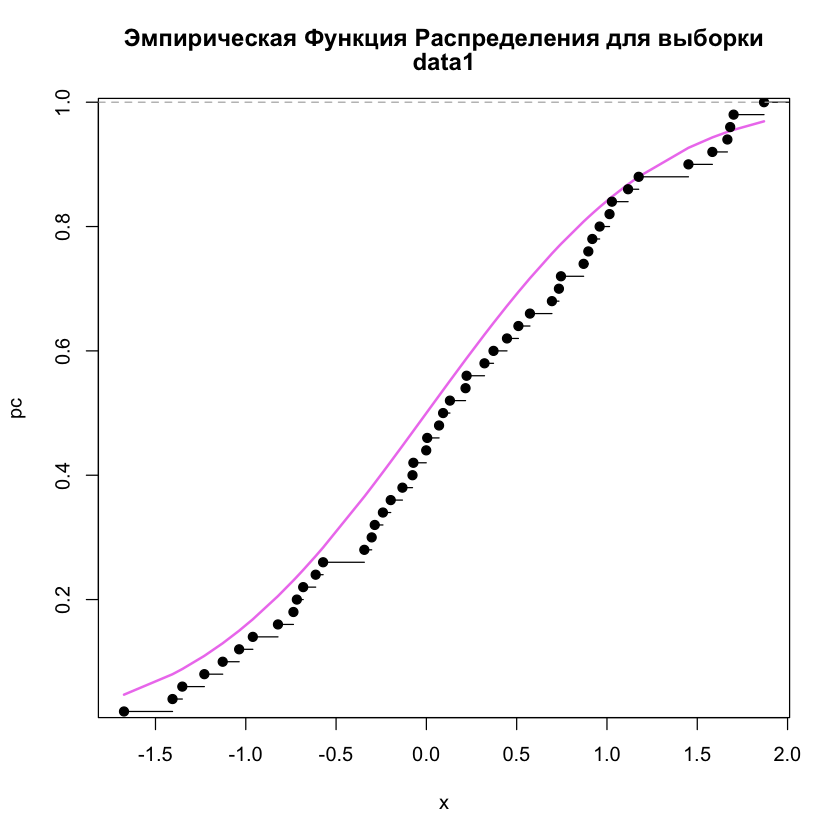

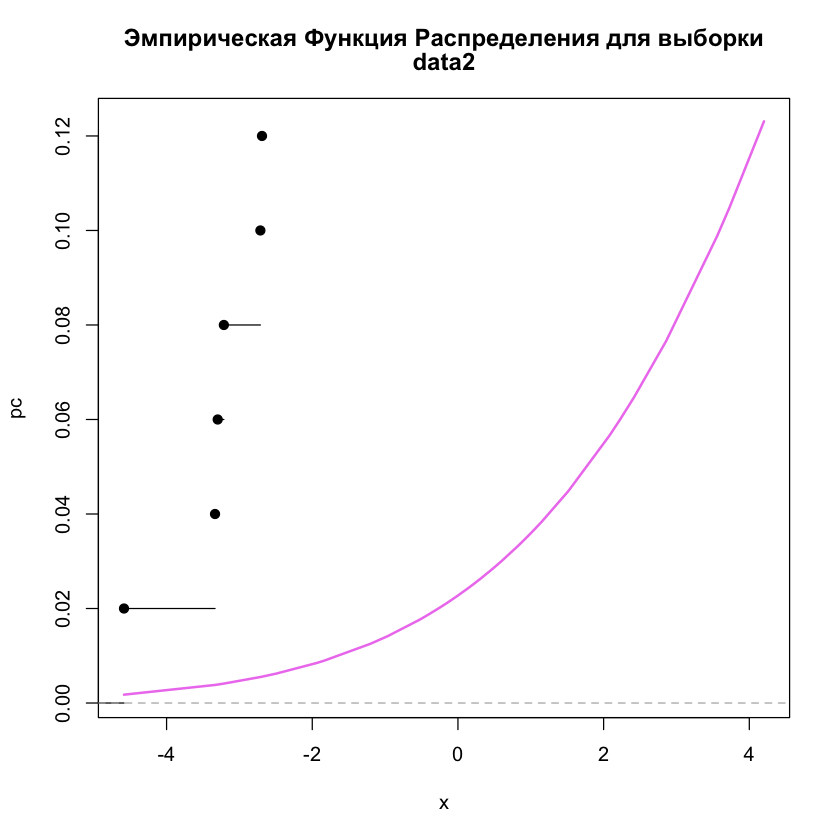

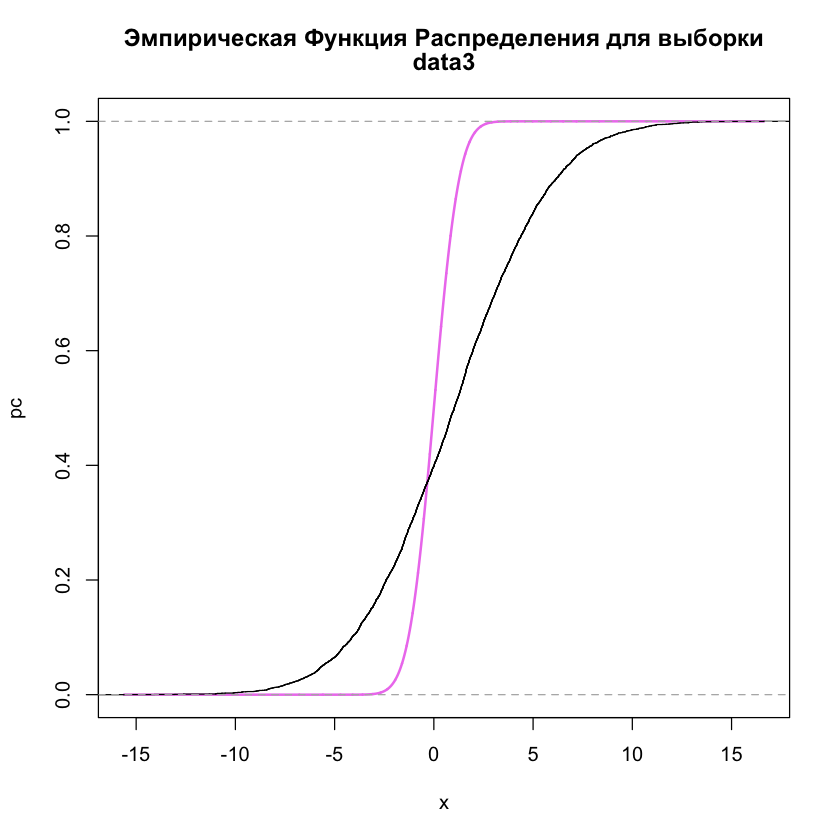

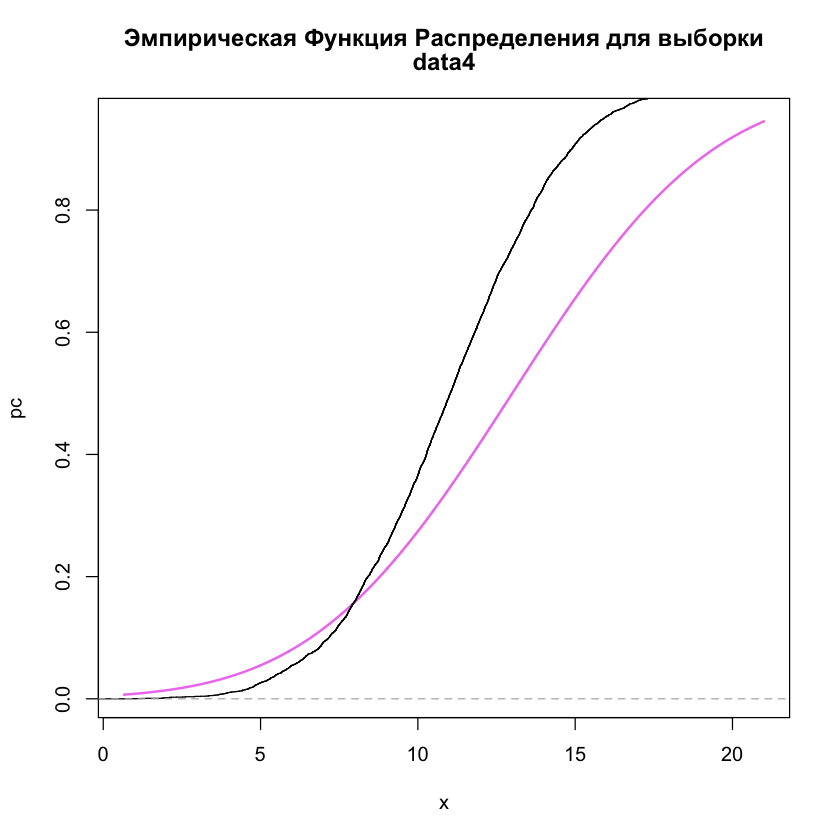

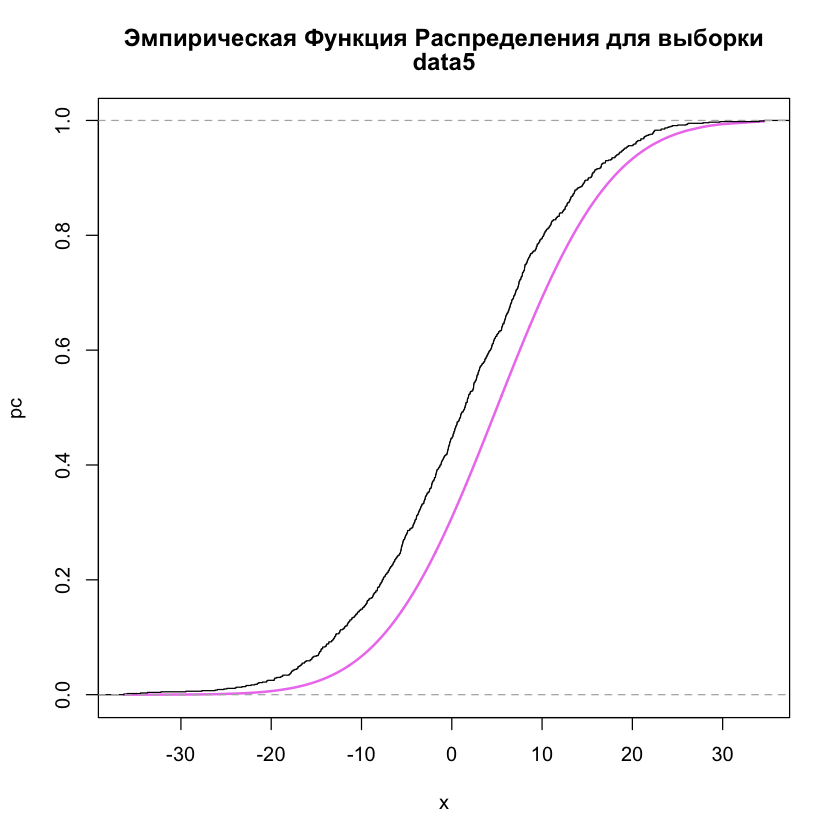

In [21]:
# R
#Выборки малого объема (не более 100)
data1 = rnorm(50, 0, 1)
data2 = rnorm(50, 0, 2)

#Выборки умеренного объема
data3 = rnorm(5000, 1, 4)
data4 = rnorm(5000, 11, 3)
data5 = rnorm(1000, 1, 11)


graph_distr <- function(x, pc, main_name = "")
{ 
  mn <- paste(c("Эмпирическая Функция Распределения для выборки", main_name))
  plot(x,pc, type = "l", col = "violet", lwd = 2, main = mn) 
  plot(ecdf(x), add = TRUE) 
}

data1 = sort(data1)
graph_distr(data1, pnorm(data1, mean = 0, sd = 1), "data1")

data2 = sort(data2)
graph_distr(data2, pnorm(data2, mean = 10, sd = 5), "data2")

data3 = sort(data3)
graph_distr(data3, pnorm(data3, mean = 0, sd = 1), "data3")

data4 = sort(data4)
graph_distr(data4, pnorm(data4, mean = 13, sd = 5), "data4")

data5 = sort(data5)
graph_distr(data5, pnorm(data5, mean = 5, sd = 10), "data5")


**<span style="color:#410083">
Квантили:
</span>**

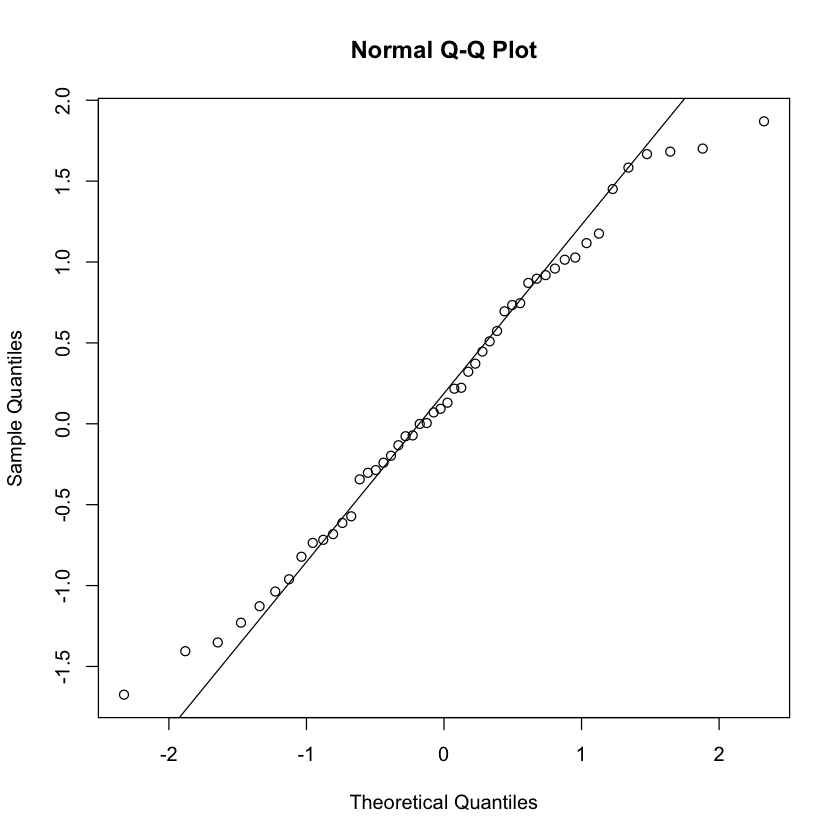

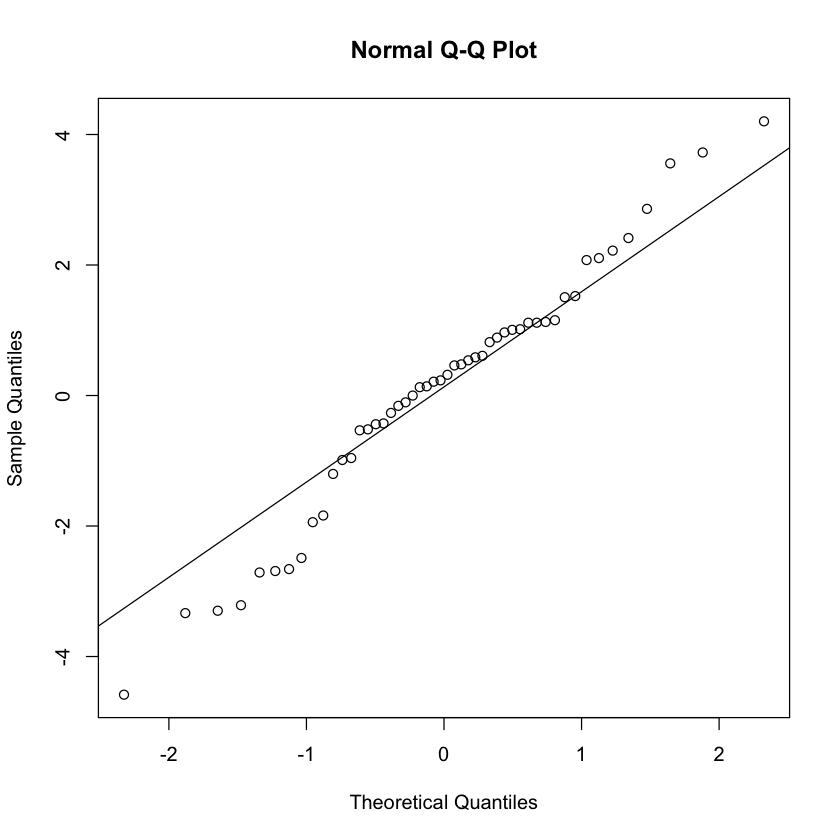

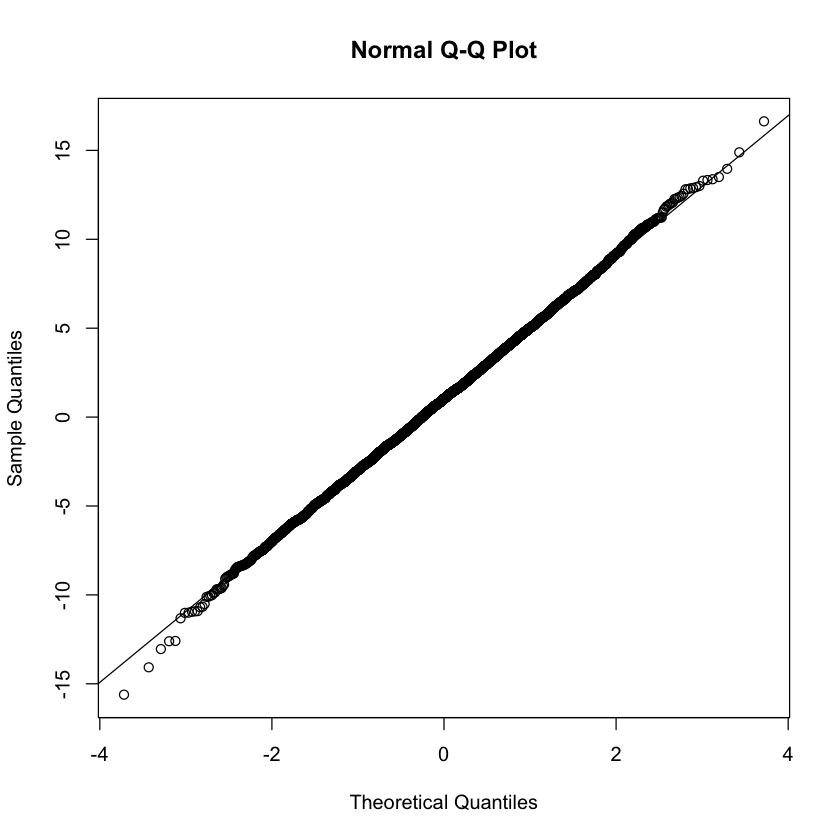

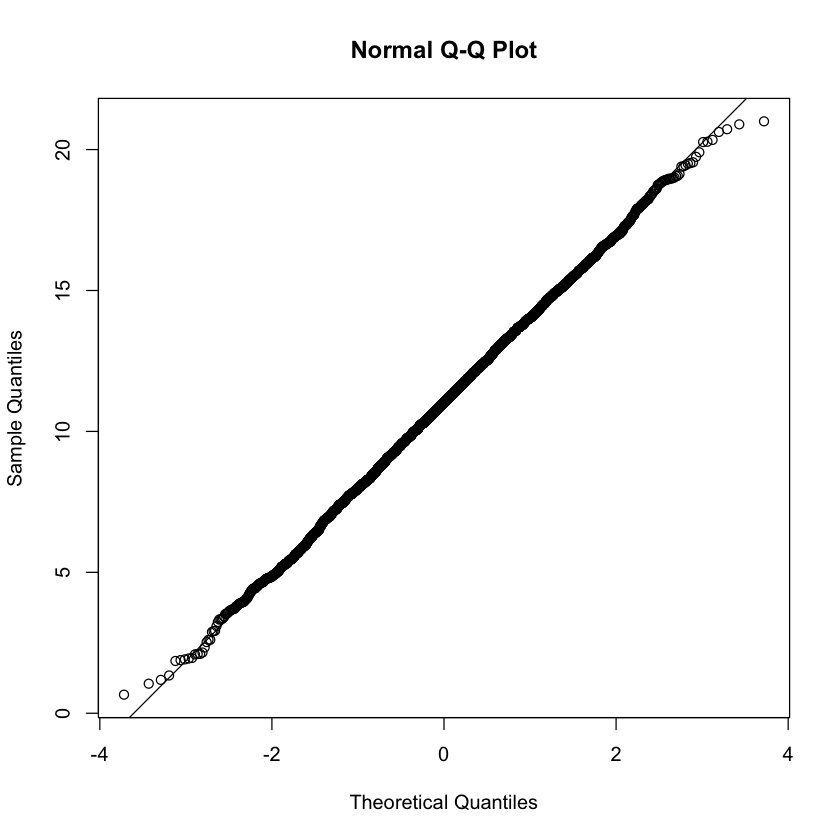

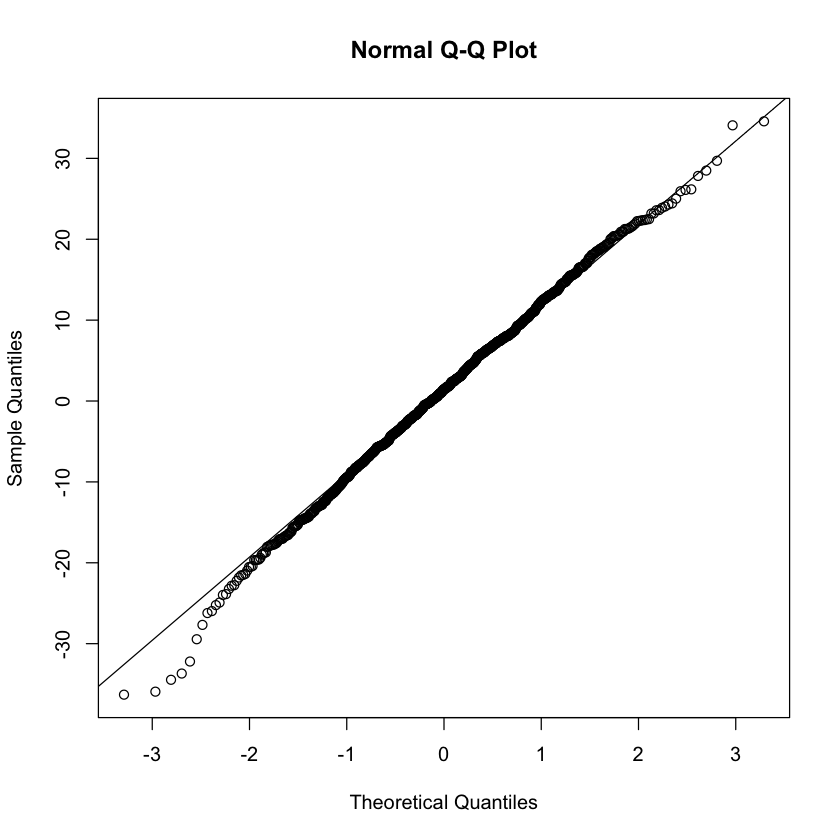

In [22]:
# R
qqgraph <- function(x){
  qqnorm(x)
  qqline(x)
}

qqgraph(data1)
qqgraph(data2)
qqgraph(data3)
qqgraph(data4)
qqgraph(data5)

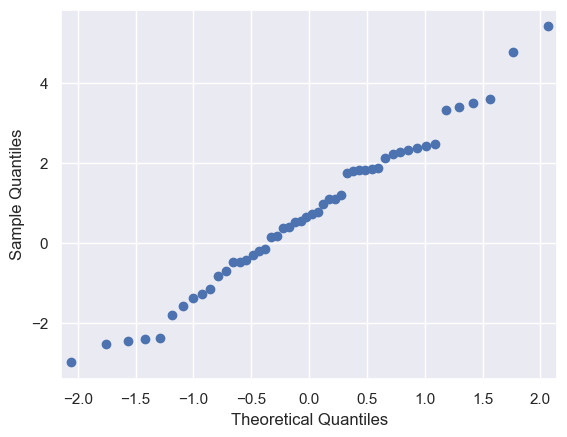

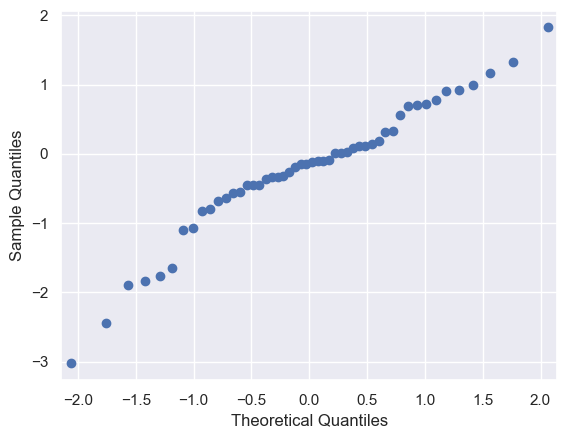

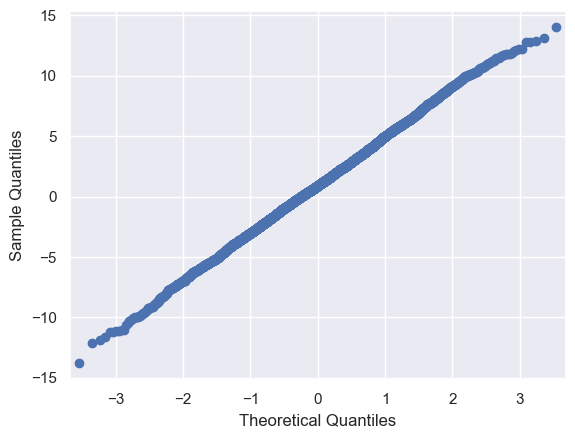

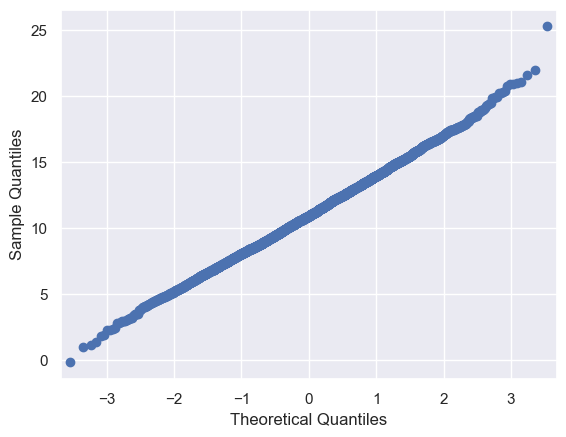

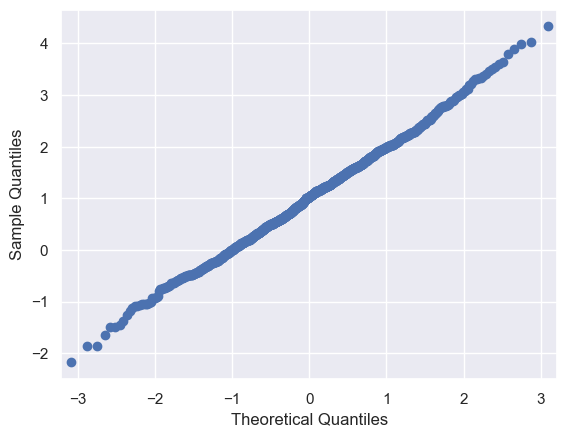

In [145]:
# Python
import statsmodels.api as sm

sm.qqplot(data1)
sm.qqplot(data2)
sm.qqplot(data3)
sm.qqplot(data4)
sm.qqplot(data5)


plt.show()

**<span style="color:#410083">
Метод огибающих:
</span>**

**Примечание:** реализацию метода огибающих нашла только на R

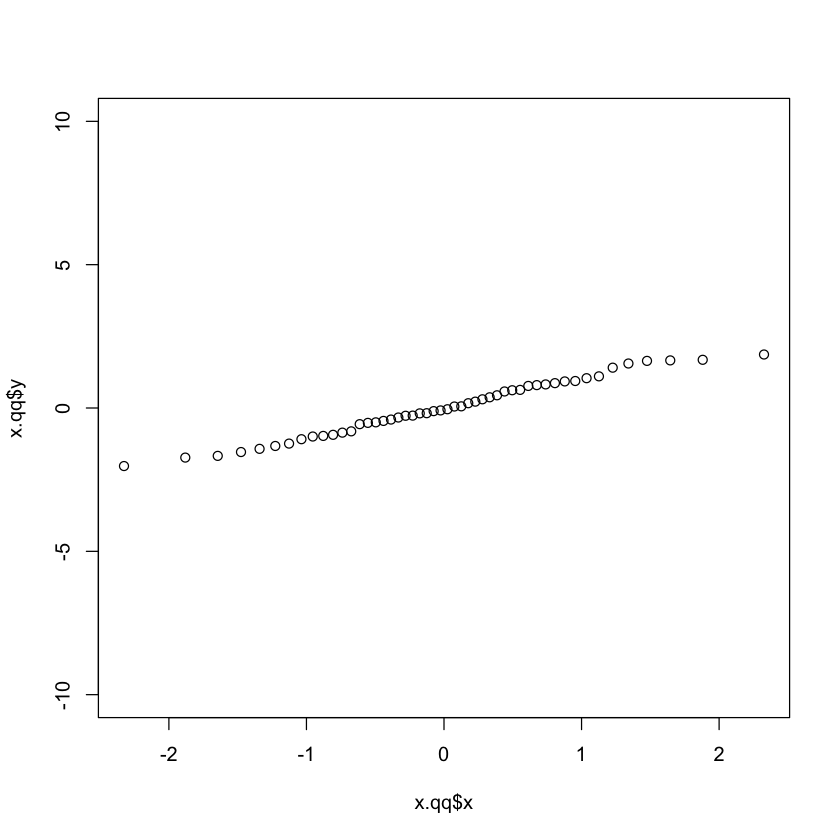

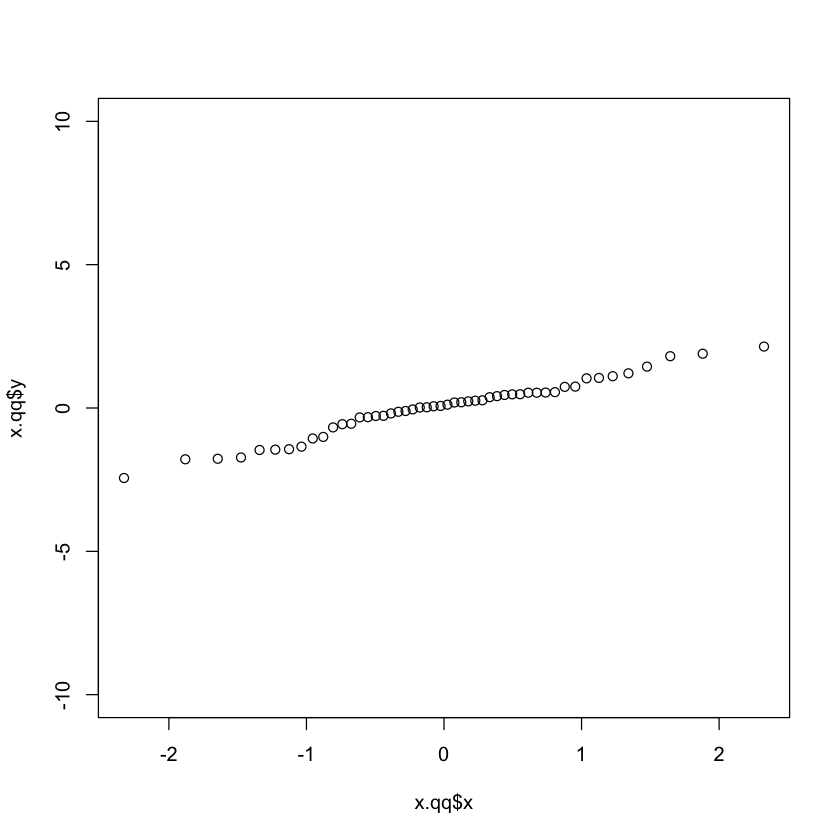

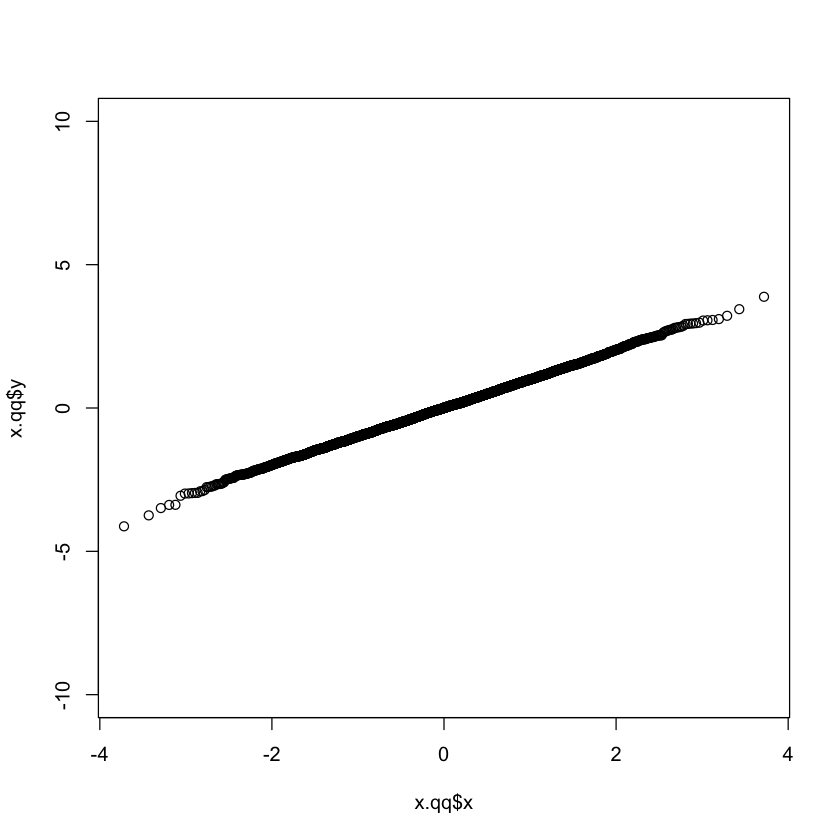

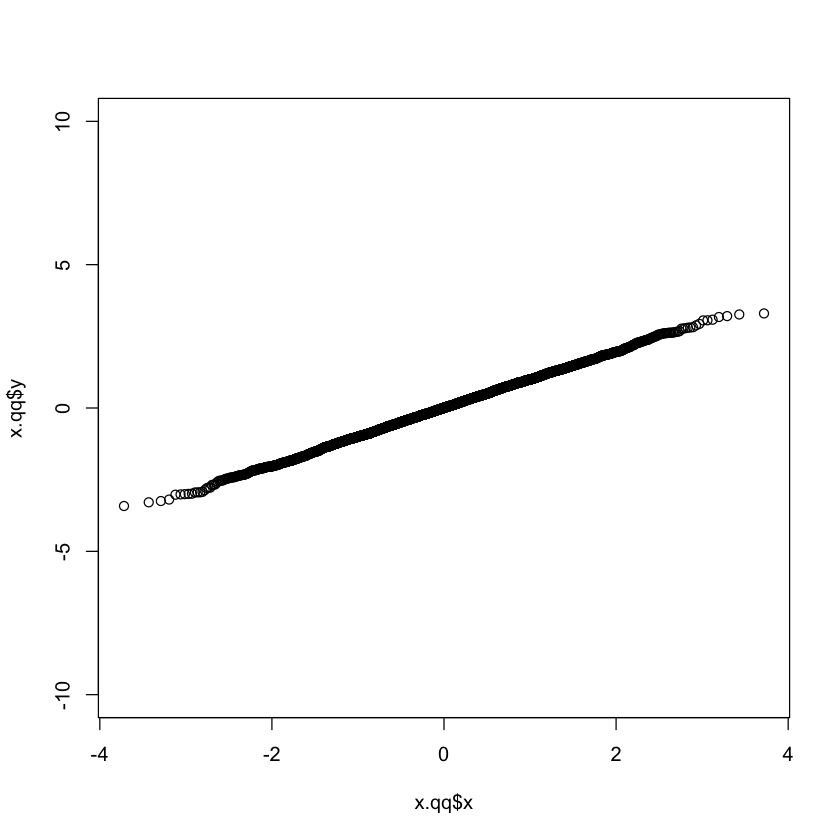

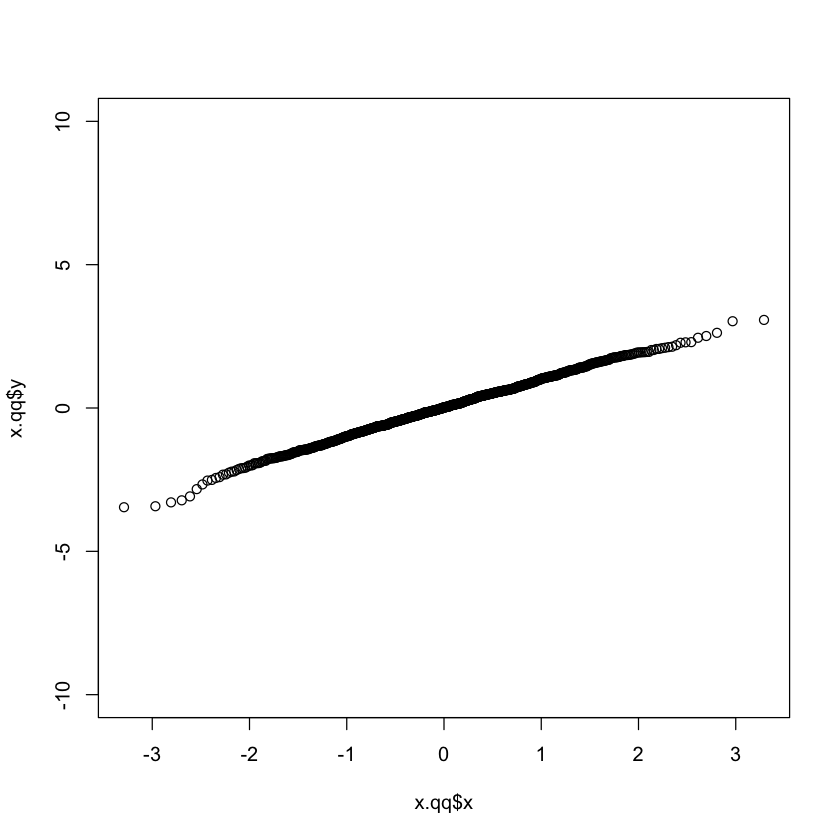

In [23]:
# R
envelmet <- function(x){
  z <- (x - mean(x))/sqrt(var(x))  #  Стандартизация выборки
  x.qq <- qqnorm(z, plot.it = FALSE)
  x.qq <- lapply(x.qq, sort)
  plot(x.qq, ylim = c(-10, 10))
}

envelmet(data1)
envelmet(data2)
envelmet(data3)
envelmet(data4)
envelmet(data5)

**<span style="color:#410083">
Стандартные процедуры проверки гипотез о нормальности:
</span>**

**<span style="color:#6852A3">
Критерий Колмогорова-Смирнова:
</span>**

In [65]:
# Python
from scipy.stats import kstest

print("1: ", kstest(data1, 'norm'))
print("2: ", kstest(data2, 'norm'))
print("3: ", kstest(data3, 'norm'))
print("4: ", kstest(data4, 'norm'))
print("5: ", kstest(data5, 'norm'))

1:  KstestResult(statistic=0.34007438841765414, pvalue=1.1553092842054505e-05)
2:  KstestResult(statistic=0.16799106944576814, pvalue=0.10571279449866022)
3:  KstestResult(statistic=0.3747439141989374, pvalue=0.0)
4:  KstestResult(statistic=0.9958940595585472, pvalue=0.0)
5:  KstestResult(statistic=0.3855813341290513, pvalue=2.7227082855966367e-134)


`pvalue` > 0.05 в data1 и data2, значит это стандартные нормальные распределения.

Одновыборный тест Колмогорова-Смирнова:

In [91]:
# R
ks.test(data1, "pnorm")
ks.test(data5, "pnorm")


	Exact one-sample Kolmogorov-Smirnov test

data:  data1
D = 0.27548, p-value = 0.0007605
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data5
D = 0.44097, p-value < 2.2e-16
alternative hypothesis: two-sided


Двухвыборный тест Колмогорова-Смирнова:

In [92]:
# R
ks.test(data1, data3)
ks.test(data4, data5)


	Asymptotic two-sample Kolmogorov-Smirnov test

data:  data1 and data3
D = 0.2468, p-value = 0.004808
alternative hypothesis: two-sided



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  data4 and data5
D = 0.606, p-value < 2.2e-16
alternative hypothesis: two-sided



**<span style="color:#6852A3">
Критерий Шапиро-Уилка:
</span>**

In [66]:
# Python
from scipy.stats import shapiro

print("1: ", shapiro(data1))
print("2: ", shapiro(data2))
print("3: ", shapiro(data3))
print("4: ", shapiro(data4))
print("5: ", shapiro(data5))

1:  ShapiroResult(statistic=0.9846875071525574, pvalue=0.7580898404121399)
2:  ShapiroResult(statistic=0.9583795070648193, pvalue=0.0760294571518898)
3:  ShapiroResult(statistic=0.9995314478874207, pvalue=0.2656184434890747)
4:  ShapiroResult(statistic=0.9991058111190796, pvalue=0.010120145976543427)
5:  ShapiroResult(statistic=0.9983657002449036, pvalue=0.4701024889945984)


`pvalue` > 0.05 везде, значит все данные нормально распределены. 

In [93]:
# R
shapiro.test(data1)
shapiro.test(data2)
shapiro.test(data3)
shapiro.test(data4)
shapiro.test(data5)


	Shapiro-Wilk normality test

data:  data1
W = 0.97785, p-value = 0.4652



	Shapiro-Wilk normality test

data:  data2
W = 0.9819, p-value = 0.6344



	Shapiro-Wilk normality test

data:  data3
W = 0.99959, p-value = 0.3819



	Shapiro-Wilk normality test

data:  data4
W = 0.99971, p-value = 0.7416



	Shapiro-Wilk normality test

data:  data5
W = 0.99688, p-value = 0.04702


**<span style="color:#6852A3">
Критерий Андерсона-Дарлинга:
</span>**



In [67]:
# Python
from scipy.stats import anderson

print("1: ", anderson(data1))
print("2: ", anderson(data2))
print("3: ", anderson(data3))
print("4: ", anderson(data4))
print("5: ", anderson(data5))

1:  AndersonResult(statistic=0.20394392762023728, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
2:  AndersonResult(statistic=0.804436870445393, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
3:  AndersonResult(statistic=0.5005194692439545, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
4:  AndersonResult(statistic=0.7979685372056338, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
5:  AndersonResult(statistic=0.39110854582906995, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [94]:
# R
ad.test(data1)
ad.test(data2)
ad.test(data3)
ad.test(data4)
ad.test(data5)


	Anderson-Darling normality test

data:  data1
A = 0.2631, p-value = 0.6869



	Anderson-Darling normality test

data:  data2
A = 0.22753, p-value = 0.8037



	Anderson-Darling normality test

data:  data3
A = 0.61887, p-value = 0.1072



	Anderson-Darling normality test

data:  data4
A = 0.17752, p-value = 0.9205



	Anderson-Darling normality test

data:  data5
A = 0.84742, p-value = 0.02917


**<span style="color:#6852A3">
Критерий Крамера фон Мизеса:
</span>**


In [68]:
# Python
from scipy.stats import cramervonmises

print("1: ", cramervonmises(data1, 'norm'))
print("2: ", cramervonmises(data2, 'norm'))
print("3: ", cramervonmises(data3, 'norm'))
print("4: ", cramervonmises(data4, 'norm'))
print("5: ", cramervonmises(data5, 'norm'))

1:  CramerVonMisesResult(statistic=1.6342702650840382, pvalue=6.930287613615693e-05)
2:  CramerVonMisesResult(statistic=0.27841230393842226, pvalue=0.15564118670508909)
3:  CramerVonMisesResult(statistic=229.27689597756378, pvalue=6.502972504929261e-08)
4:  CramerVonMisesResult(statistic=1664.9360206703616, pvalue=3.053911468153814e-07)
5:  CramerVonMisesResult(statistic=80.27154208428506, pvalue=3.7996782609184265e-08)


1 и 2 тест - стандартное нормальное распределение.

In [96]:
# R
cvm.test(data1)
cvm.test(data2)
cvm.test(data3)


	Cramer-von Mises normality test

data:  data1
W = 0.041489, p-value = 0.6466



	Cramer-von Mises normality test

data:  data2
W = 0.031741, p-value = 0.8181



	Cramer-von Mises normality test

data:  data3
W = 0.097754, p-value = 0.1208



**<span style="color:#6852A3">
Критерий Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия:
</span>**

In [69]:
# Python
from statsmodels.stats.diagnostic import lilliefors

print("1: ", lilliefors(data1, 'norm'))
print("2: ", lilliefors(data2, 'norm'))
print("3: ", lilliefors(data3, 'norm'))
print("4: ", lilliefors(data4, 'norm'))
print("5: ", lilliefors(data5, 'norm'))

1:  (0.08111911791124593, 0.5574640982705532)
2:  (0.11923711707418222, 0.07241744844616083)
3:  (0.010150133432890618, 0.2444616662415989)
4:  (0.011418138501712027, 0.12291816473145986)
5:  (0.019122581218676826, 0.5820507185958419)


`pvalue` > 0.05 во всех тестах (на всех данных). Значит все данные распределены нормально.

In [99]:
# R
lillie.test(data1)
lillie.test(data2)
lillie.test(data3)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data1
D = 0.081991, p-value = 0.5479



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data2
D = 0.078338, p-value = 0.6209



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  data3
D = 0.010908, p-value = 0.1591


<span style="color:#6852A3">
<h2>

6. Продемонстрировать пример анализа данных с помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности. Рассмотреть выборки малого и умеренного объемов.

</h2>
</span>

Рассмотрим распределение возраста игроков в лиге. Выборка малого объема имеет 422 записи, а выборка умеренного объема - 24616.

In [70]:
# Python
age_small = nba_stats['Age']
age_small = age_small.dropna()
print(len(age_small))

422


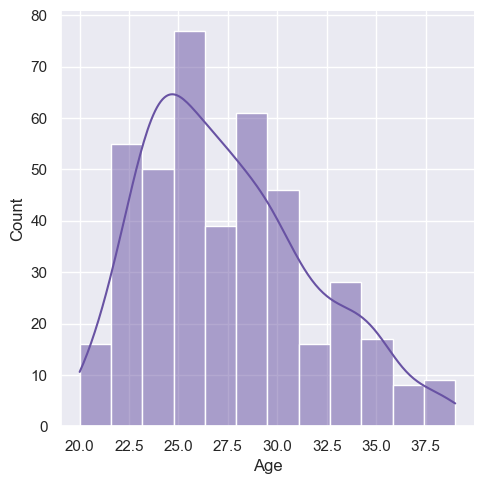

In [72]:
# Python
sns.displot(x = 'Age', data = nba_stats, kde = True, color = my_color);

In [73]:
# Python
age_big = nba_seasons['Age']
age_big = age_big.dropna()
print(len(age_big))

24616


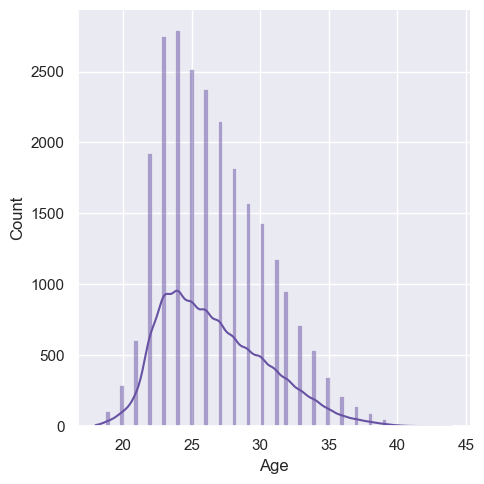

In [75]:
# Python
sns.displot(x = 'Age', data = nba_seasons, kde = True, color = my_color);

In [27]:
# R
age_small <- nba_stats$Age
age_small <- na.omit(age_small)

age_big <- nba_seasons$Age
age_big <- na.omit(age_big)

In [32]:
length(age_small)

[1] 422

In [33]:
length(age_big)

[1] 24616

**<span style="color:#6852A3">
Графики квантилей:
</span>**

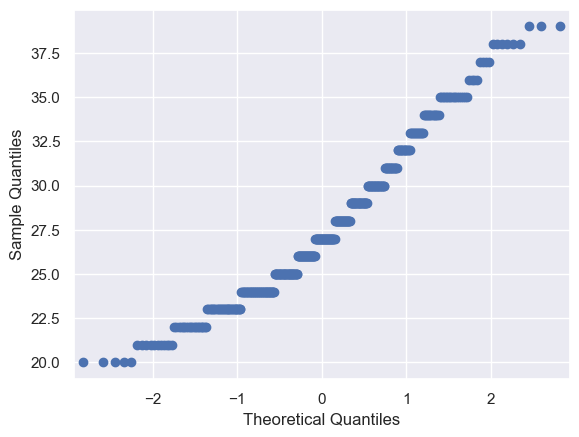

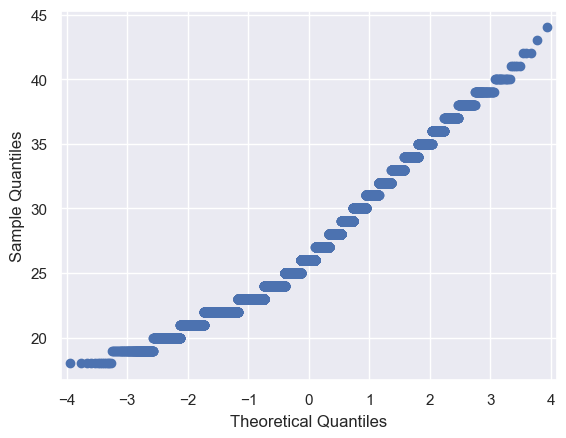

In [76]:
# Python
sm.qqplot(age_small)
sm.qqplot(age_big)
plt.show()

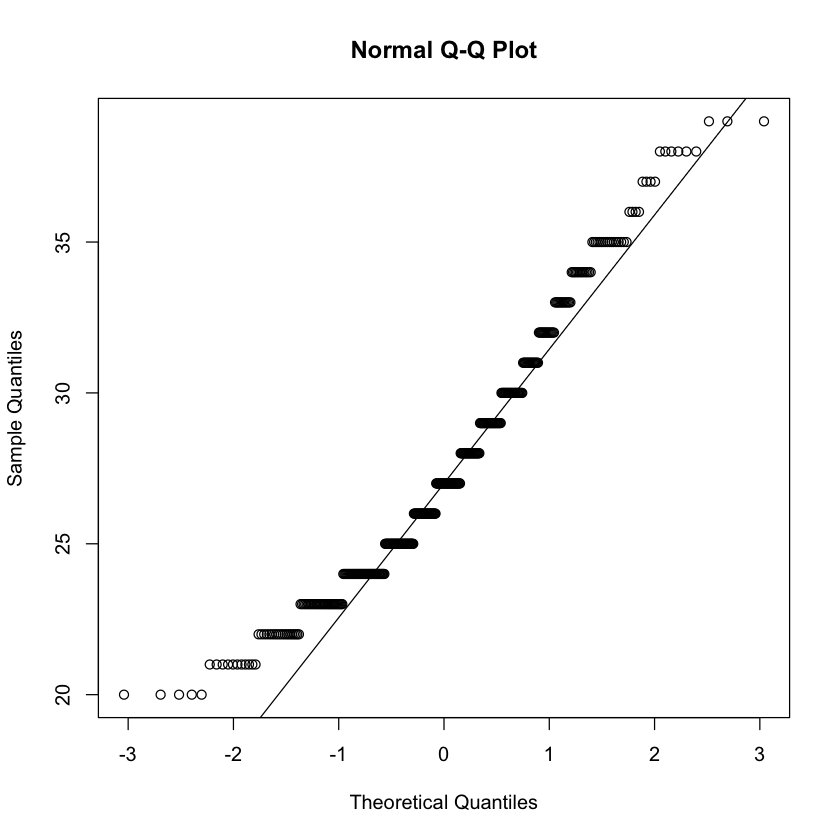

In [14]:
# R
qqgraph <- function(x){
  qqnorm(x)
  qqline(x)
}

qqgraph(age_small)

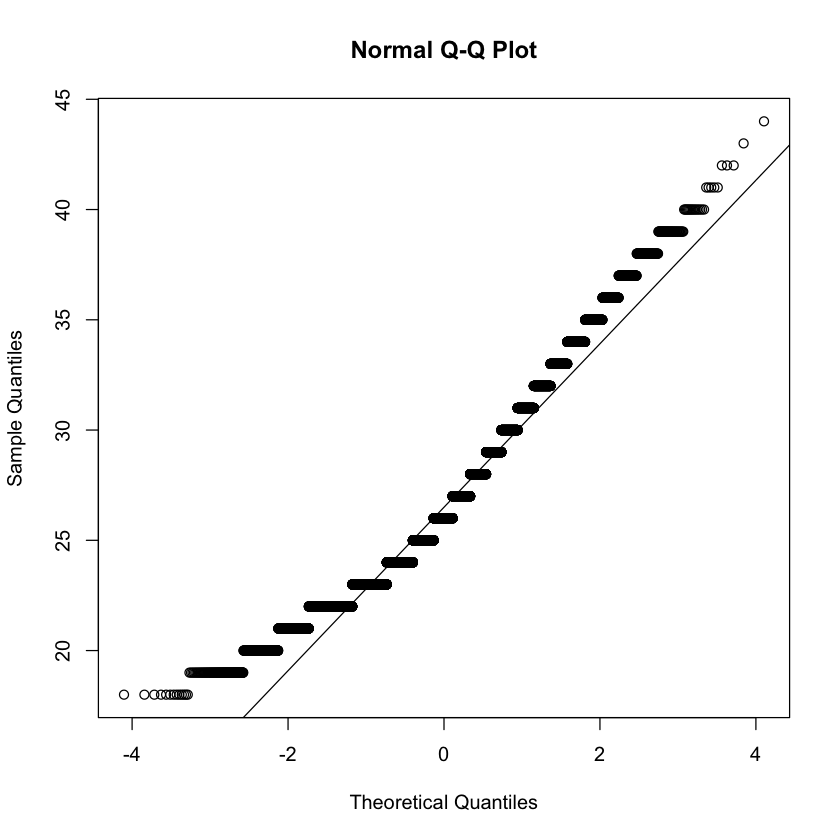

In [28]:
qqgraph(age_big)

**<span style="color:#6852A3">
Гипотезы о нормальности:
</span>**

**Малая выборка:**

In [77]:
# Python
print(kstest(age_small, 'norm'))
print(shapiro(age_small))
print(anderson(age_small))
print(cramervonmises(age_small, 'norm'))
print(lilliefors(age_small, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.9571580290794373, pvalue=9.831688796424487e-10)
AndersonResult(statistic=5.672400009454407, critical_values=array([0.571, 0.65 , 0.78 , 0.91 , 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
CramerVonMisesResult(statistic=140.66666666666669, pvalue=0)
(0.11000548571765262, 0.0009999999999998899)


`p_value` < 0.05 по всем критериям. Значит данные не распределены нормально.</br>
В критерии Андерсона-Дарлинга полученное значение статистики больше критических значений -> нулевая гипотеза $H_0$ о нормальном распределении неверна.

Аналогичные результаты получаем с помощью тестов, реализованных с помощью функций на языке R:


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  age_small
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided



	Shapiro-Wilk normality test

data:  age_small
W = 0.95716, p-value = 9.835e-10



	Anderson-Darling normality test

data:  age_small
A = 5.6724, p-value = 5.413e-14



	Cramer-von Mises normality test

data:  age_small
W = 0.92769, p-value = 3.005e-09



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  age_small
D = 0.11001, p-value = 2.533e-13


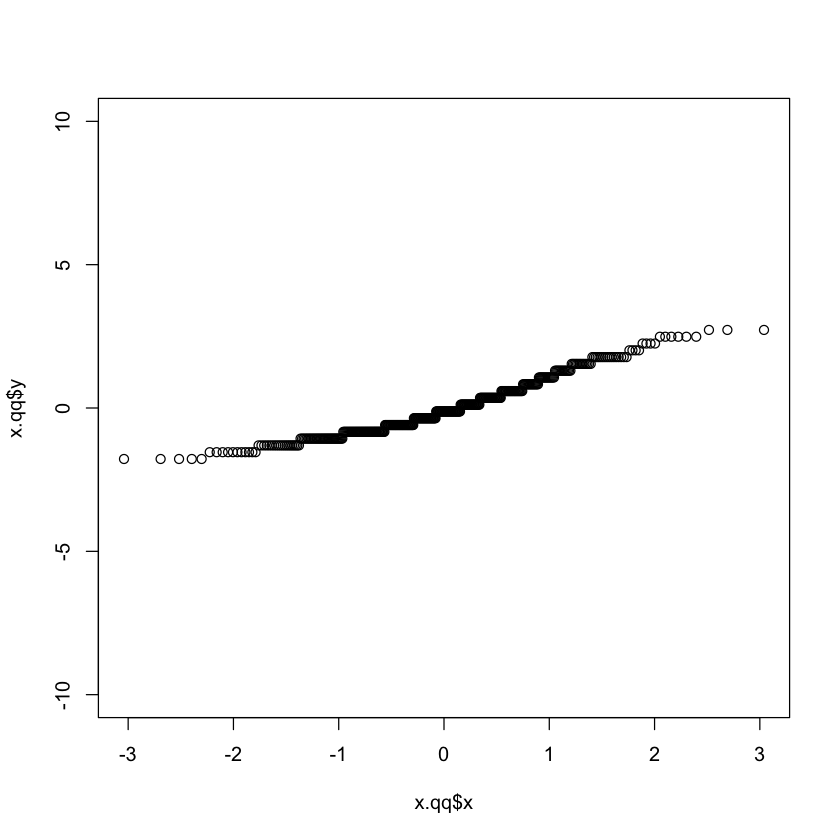

In [24]:
# R
envelmet(age_small)
ks.test(age_small, "pnorm")
shapiro.test(age_small)
ad.test(age_small)
cvm.test(age_small)
lillie.test(age_small)

**Умеренная выборка:**

In [78]:
# Python
print(kstest(age_big, 'norm'))
print(shapiro(age_big))
print(anderson(age_big))
print(cramervonmises(age_big, 'norm'))
print(lilliefors(age_big, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.9604790806770325, pvalue=0.0)
AndersonResult(statistic=314.8563269767292, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
CramerVonMisesResult(statistic=8205.333333333334, pvalue=0)
(0.1147226994720083, 0.0009999999999998899)



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  age_big
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided



	Anderson-Darling normality test

data:  age_big
A = 314.86, p-value < 2.2e-16



	Cramer-von Mises normality test

data:  age_big
W = 52.883, p-value = 7.37e-10



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  age_big
D = 0.11472, p-value < 2.2e-16


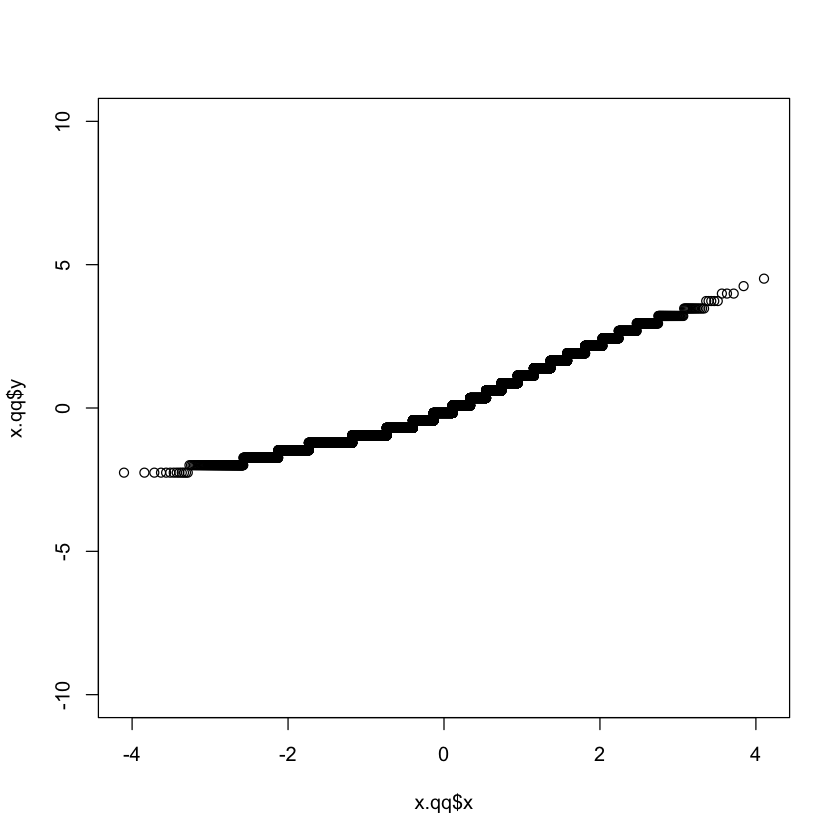

In [36]:
# R
envelmet(age_big)
ks.test(age_big, "pnorm")
ad.test(age_big)
cvm.test(age_big)
lillie.test(age_big)

Аналогичная ситуация и с данными умеренной выборки.</br>
**Вывод**: возраст игроков в лиге не распределён нормально.

<span style="color:#6852A3">
<h2>

7. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:
- Стьюдента,  включая  односторонние  варианты,  когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних  значений  больше  (или  меньше)  другого.  Реализовать  оценку мощности  критериев  при  заданном  объеме  выборки  или  определения объема выборки для достижения заданной мощности;
- Уилкоксона-Манна-Уитни (ранговые);
- Фишера,  Левене,  Бартлетта,  Флигнера-Килина  (проверка гипотез об однородности дисперсий).

</h2>
</span> 

In [79]:
# Python
norm0_4 = np.random.normal(0, 4, size = 100)
norm1_1 = np.random.normal(1, 1, size = 500)
norm0_9 = np.random.normal(0, 9, size = 3000)

from pingouin import ttest

In [38]:
# R
norm0_4 <-  rnorm(100, sd = 4)
norm1_1 <- rnorm(500, mean = 1, sd = 11)
norm0_9 <- rnorm(3000, mean = 0, sd = 9) 

**<span style="color:#6852A3">
Критерий Стьюдента:
</span>**

Нулевая гипотеза $H_0$: средние значения двух выборок не равны (если параметр `alternative = 'two-sided'`) ИЛИ среднее первой выборки больше, чем среднее второй выборки (если параметр `alternative = 'greater'`).</br> Гипотеза верна, если `p_value` > 0.05, и неверна, если `p_value` < 0.05.

**<span style="color:#410083">
Доверительный уровень 0.9:
</span>**

In [147]:
# Python
ttest(norm0_4, norm0_9, alternative = 'two-sided', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,0.439744,135.633255,two-sided,0.660822,"[-0.5297524396508206, 0.9127699971995367]",0.021283,0.123,0.055033


In [81]:
# Python
ttest(norm0_4, norm0_9, alternative = 'greater', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,0.439744,135.633255,greater,0.330411,"[-0.3693395772032982, inf]",0.021283,0.247,0.075568


In [82]:
# Python
ttest(norm0_4, norm1_1, alternative = 'two-sided', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-1.773973,101.090457,two-sided,0.079079,"[-1.3892411953747899, -0.0460806155829652]",0.389683,0.545,0.944265


In [83]:
# Python
ttest(norm0_4, norm1_1, alternative = 'greater', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,-1.773973,101.090457,greater,0.960461,"[-1.2395233893655442, inf]",0.389683,0.918,9.963661e-08


In [84]:
# Python
ttest(norm1_1, norm0_9, alternative = 'two-sided', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,5.301883,3303.984313,two-sided,1.221444e-07,"[0.6270301938908214, 1.1913091746156503]",0.107615,5.799e+04,0.605385


In [85]:
# Python
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.9)

,T,dof,alternative,p-val,CI90%,cohen-d,BF10,power
T-test,5.301883,3303.984313,greater,6.107219e-08,"[0.6893645863387176, inf]",0.107615,1.16e+05,0.719907


In [39]:
# R
t.test(norm0_4, mu = 0, conf.level = 0.9)
t.test(norm0_4, mu = 0.7, conf.level = 0.9)
t.test(norm0_4, mu = 0.5, conf.level = 0.9)

t.test(norm1_1, mu = 0, conf.level = 0.9)
t.test(norm1_1, mu = 15, conf.level = 0.9)
t.test(norm1_1, mu = 9.5, conf.level = 0.9)

t.test(norm0_9, mu = 0.316, conf.level = 0.9)
t.test(norm0_9, mu = 0.25, conf.level = 0.9)
t.test(norm0_9, mu = 0.41, conf.level = 0.9)


	One Sample t-test

data:  norm0_4
t = -0.45007, df = 99, p-value = 0.6536
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
 -0.8675536  0.4975287
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm0_4
t = -2.1529, df = 99, p-value = 0.03375
alternative hypothesis: true mean is not equal to 0.7
90 percent confidence interval:
 -0.8675536  0.4975287
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm0_4
t = -1.6664, df = 99, p-value = 0.09879
alternative hypothesis: true mean is not equal to 0.5
90 percent confidence interval:
 -0.8675536  0.4975287
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm1_1
t = 1.6535, df = 499, p-value = 0.09886
alternative hypothesis: true mean is not equal to 0
90 percent confidence interval:
 0.002855503 1.688595721
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm1_1
t = -27.673, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 15
90 percent confidence interval:
 0.002855503 1.688595721
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm1_1
t = -16.92, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 9.5
90 percent confidence interval:
 0.002855503 1.688595721
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm0_9
t = -1.5239, df = 2999, p-value = 0.1276
alternative hypothesis: true mean is not equal to 0.316
90 percent confidence interval:
 -0.1956324  0.3356104
sample estimates:
mean of x 
 0.069989 



	One Sample t-test

data:  norm0_9
t = -1.1151, df = 2999, p-value = 0.2649
alternative hypothesis: true mean is not equal to 0.25
90 percent confidence interval:
 -0.1956324  0.3356104
sample estimates:
mean of x 
 0.069989 



	One Sample t-test

data:  norm0_9
t = -2.1062, df = 2999, p-value = 0.03527
alternative hypothesis: true mean is not equal to 0.41
90 percent confidence interval:
 -0.1956324  0.3356104
sample estimates:
mean of x 
 0.069989 


**<span style="color:#410083">
Доверительный уровень 0.95:
</span>**

In [86]:
# Python
ttest(norm0_4, norm0_9, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.439744,135.633255,two-sided,0.660822,"[-0.67, 1.05]",0.021283,0.123,0.055033


In [87]:
# Python
ttest(norm0_4, norm0_9, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.439744,135.633255,greater,0.330411,"[-0.53, inf]",0.021283,0.247,0.075568


In [88]:
# Python
ttest(norm0_4, norm1_1, alternative = 'two-sided', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.773973,101.090457,two-sided,0.079079,"[-1.52, 0.08]",0.389683,0.545,0.944265


In [89]:
# Python
ttest(norm0_4, norm1_1, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.773973,101.090457,greater,0.960461,"[-1.39, inf]",0.389683,0.918,9.963661e-08


In [90]:
# Python
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.301883,3303.984313,greater,6.107219e-08,"[0.63, inf]",0.107615,1.16e+05,0.719907


In [91]:
# Python
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.301883,3303.984313,greater,6.107219e-08,"[0.63, inf]",0.107615,1.16e+05,0.719907


In [40]:
# R
t.test(norm0_4, mu = 0, conf.level = 0.95)
t.test(norm0_4, mu = 0.7, conf.level = 0.95)
t.test(norm0_4, mu = 0.5, conf.level = 0.95)

t.test(norm1_1, mu = 0, conf.level = 0.95)
t.test(norm1_1, mu = 15, conf.level = 0.95)
t.test(norm1_1, mu = 9.5, conf.level = 0.95)

t.test(norm0_9, mu = 0.316, conf.level = 0.95)
t.test(norm0_9, mu = 0.25, conf.level = 0.95)
t.test(norm0_9, mu = 0.41, conf.level = 0.95)


	One Sample t-test

data:  norm0_4
t = -0.45007, df = 99, p-value = 0.6536
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -1.0006695  0.6306446
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm0_4
t = -2.1529, df = 99, p-value = 0.03375
alternative hypothesis: true mean is not equal to 0.7
95 percent confidence interval:
 -1.0006695  0.6306446
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm0_4
t = -1.6664, df = 99, p-value = 0.09879
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 -1.0006695  0.6306446
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm1_1
t = 1.6535, df = 499, p-value = 0.09886
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.1591889  1.8506401
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm1_1
t = -27.673, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 15
95 percent confidence interval:
 -0.1591889  1.8506401
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm1_1
t = -16.92, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 9.5
95 percent confidence interval:
 -0.1591889  1.8506401
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm0_9
t = -1.5239, df = 2999, p-value = 0.1276
alternative hypothesis: true mean is not equal to 0.316
95 percent confidence interval:
 -0.2465484  0.3865264
sample estimates:
mean of x 
 0.069989 



	One Sample t-test

data:  norm0_9
t = -1.1151, df = 2999, p-value = 0.2649
alternative hypothesis: true mean is not equal to 0.25
95 percent confidence interval:
 -0.2465484  0.3865264
sample estimates:
mean of x 
 0.069989 



	One Sample t-test

data:  norm0_9
t = -2.1062, df = 2999, p-value = 0.03527
alternative hypothesis: true mean is not equal to 0.41
95 percent confidence interval:
 -0.2465484  0.3865264
sample estimates:
mean of x 
 0.069989 


**<span style="color:#410083">
Доверительный уровень 0.99:
</span>**

In [92]:
# Python
ttest(norm0_4, norm0_9, alternative = 'two-sided', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,0.439744,135.633255,two-sided,0.660822,"[-0.94626419665355, 1.3292817542022657]",0.021283,0.123,0.055033


In [93]:
# Python
ttest(norm0_4, norm0_9, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,0.439744,135.633255,greater,0.330411,"[-0.8337273560405114, inf]",0.021283,0.247,0.075568


In [94]:
# Python
ttest(norm0_4, norm1_1, alternative = 'two-sided', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-1.773973,101.090457,two-sided,0.079079,"[-1.7797429060190684, 0.34442109506131324]",0.389683,0.545,0.944265


In [95]:
# Python
ttest(norm0_4, norm1_1, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-1.773973,101.090457,greater,0.960461,"[-1.673937589494286, inf]",0.389683,0.918,9.963661e-08


In [96]:
# Python
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.301883,3303.984313,greater,6.107219e-08,"[0.5100526692543756, inf]",0.107615,1.16e+05,0.719907


In [97]:
# Python
ttest(norm1_1, norm0_9, alternative = 'greater', confidence = 0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,5.301883,3303.984313,greater,6.107219e-08,"[0.5100526692543756, inf]",0.107615,1.16e+05,0.719907


In [41]:
# R
t.test(norm0_4, mu = 0, conf.level = 0.99)
t.test(norm0_4, mu = 0.7, conf.level = 0.99)
t.test(norm0_4, mu = 0.5, conf.level = 0.99)

t.test(norm1_1, mu = 0, conf.level = 0.99)
t.test(norm1_1, mu = 15, conf.level = 0.99)
t.test(norm1_1, mu = 9.5, conf.level = 0.99)

t.test(norm0_9, mu = 0.316, conf.level = 0.99)
t.test(norm0_9, mu = 0.25, conf.level = 0.99)
t.test(norm0_9, mu = 0.41, conf.level = 0.99)


	One Sample t-test

data:  norm0_4
t = -0.45007, df = 99, p-value = 0.6536
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 -1.2646555  0.8946306
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm0_4
t = -2.1529, df = 99, p-value = 0.03375
alternative hypothesis: true mean is not equal to 0.7
99 percent confidence interval:
 -1.2646555  0.8946306
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm0_4
t = -1.6664, df = 99, p-value = 0.09879
alternative hypothesis: true mean is not equal to 0.5
99 percent confidence interval:
 -1.2646555  0.8946306
sample estimates:
 mean of x 
-0.1850124 



	One Sample t-test

data:  norm1_1
t = 1.6535, df = 499, p-value = 0.09886
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 -0.4768103  2.1682616
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm1_1
t = -27.673, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 15
99 percent confidence interval:
 -0.4768103  2.1682616
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm1_1
t = -16.92, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 9.5
99 percent confidence interval:
 -0.4768103  2.1682616
sample estimates:
mean of x 
0.8457256 



	One Sample t-test

data:  norm0_9
t = -1.5239, df = 2999, p-value = 0.1276
alternative hypothesis: true mean is not equal to 0.316
99 percent confidence interval:
 -0.3461086  0.4860866
sample estimates:
mean of x 
 0.069989 



	One Sample t-test

data:  norm0_9
t = -1.1151, df = 2999, p-value = 0.2649
alternative hypothesis: true mean is not equal to 0.25
99 percent confidence interval:
 -0.3461086  0.4860866
sample estimates:
mean of x 
 0.069989 



	One Sample t-test

data:  norm0_9
t = -2.1062, df = 2999, p-value = 0.03527
alternative hypothesis: true mean is not equal to 0.41
99 percent confidence interval:
 -0.3461086  0.4860866
sample estimates:
mean of x 
 0.069989 


In [42]:
# R
t.test(norm0_4, norm0_9, alternative = 'two.sided')
t.test(norm0_4, norm0_9, alternative = 'greater')
t.test(norm0_4, norm0_9, alternative = 'less')

t.test(norm0_4, norm1_1, alternative = 'two.sided')
t.test(norm0_4, norm1_1, alternative = 'greater')
t.test(norm0_4, norm1_1, alternative = 'less')


	Welch Two Sample t-test

data:  norm0_4 and norm0_9
t = -0.5774, df = 131.79, p-value = 0.5647
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1286140  0.6186111
sample estimates:
 mean of x  mean of y 
-0.1850124  0.0699890 



	Welch Two Sample t-test

data:  norm0_4 and norm0_9
t = -0.5774, df = 131.79, p-value = 0.7177
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.9865705        Inf
sample estimates:
 mean of x  mean of y 
-0.1850124  0.0699890 



	Welch Two Sample t-test

data:  norm0_4 and norm0_9
t = -0.5774, df = 131.79, p-value = 0.2823
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.4765676
sample estimates:
 mean of x  mean of y 
-0.1850124  0.0699890 



	Welch Two Sample t-test

data:  norm0_4 and norm1_1
t = -1.5708, df = 435.66, p-value = 0.117
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.3204362  0.2589601
sample estimates:
 mean of x  mean of y 
-0.1850124  0.8457256 



	Welch Two Sample t-test

data:  norm0_4 and norm1_1
t = -1.5708, df = 435.66, p-value = 0.9415
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -2.11238      Inf
sample estimates:
 mean of x  mean of y 
-0.1850124  0.8457256 



	Welch Two Sample t-test

data:  norm0_4 and norm1_1
t = -1.5708, df = 435.66, p-value = 0.05848
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf 0.0509039
sample estimates:
 mean of x  mean of y 
-0.1850124  0.8457256 


**<span style="color:#6852A3">
Критерий Уилкоксона-Манна-Уитни:
</span>**

Из документации к функции `mannwhineyu()`:
```
    We use the Mann-Whitney U test to assess whether there is a statistically
    significant difference in the diagnosis age of males and females.
    The null hypothesis is that the distribution of male diagnosis ages is
    the same as the distribution of female diagnosis ages. We decide
    that a confidence level of 95% is required to reject the null hypothesis
    in favor of the alternative that the distributions are different.
    Since the number of samples is very small and there are no ties in the
    data, we can compare the observed test statistic against the *exact*
    distribution of the test statistic under the null hypothesis.
```

Доверительный интервал = 0.95

Нулевая гипотеза $H_0$: распределения двух выборок не равны (параметр `alternative = 'two-sided`') ИЛИ распределение первой выборки стохастически больше распределения второй выборки (параметр `alternative = 'greater'`).</br> 
Гипотеза верна, если `p_value` > 0.05, и неверна, если `p_value` < 0.05.

In [148]:
# Python
pois1 = np.random.poisson(7, 14)
pois3 = np.random.poisson(7, 7)
pois2 = np.random.poisson(14, 7)

from scipy.stats import mannwhitneyu

print(mannwhitneyu(pois1, pois2, alternative='two-sided'))
print(mannwhitneyu(pois1, pois3, alternative='two-sided'))
print(mannwhitneyu(pois3, pois2, alternative='two-sided'))
print(mannwhitneyu(pois1, pois2, alternative='greater'))
print(mannwhitneyu(pois1, pois3, alternative='greater'))
print(mannwhitneyu(pois3, pois2, alternative='greater'))

MannwhitneyuResult(statistic=7.0, pvalue=0.0018435085648001617)
MannwhitneyuResult(statistic=34.5, pvalue=0.29184054514378865)
MannwhitneyuResult(statistic=12.0, pvalue=0.1227059803065297)
MannwhitneyuResult(statistic=7.0, pvalue=0.9992871435804214)
MannwhitneyuResult(statistic=34.5, pvalue=0.8706322455321593)
MannwhitneyuResult(statistic=12.0, pvalue=0.9527517157249085)


In [46]:
# R
pois1 <-  rpois(7, 14)
pois2 <- rpois(7, 7)
pois3 <- rpois(14, 7)

mean(pois1)
mean(pois2)
mean(pois3)

wilcox.test(pois1, mu = mean(pois1), exact = FALSE)
wilcox.test(pois2, mu = mean(pois2), exact = FALSE)
wilcox.test(pois3, mu = mean(pois3), exact = FALSE)

[1] 14.71429

[1] 9.428571

[1] 6.857143


	Wilcoxon signed rank test with continuity correction

data:  pois1
V = 14, p-value = 1
alternative hypothesis: true location is not equal to 14.71429



	Wilcoxon signed rank test with continuity correction

data:  pois2
V = 13, p-value = 0.9325
alternative hypothesis: true location is not equal to 9.428571



	Wilcoxon signed rank test with continuity correction

data:  pois3
V = 56, p-value = 0.8502
alternative hypothesis: true location is not equal to 6.857143


**<span style="color:#6852A3">
Критерии Фишера,  Левене,  Бартлетта,  Флигнера-Килина  (проверка гипотез об однородности дисперсий):
</span>**

Нулевая гипотеза $H_0$: дисперсии двух выборок равны. </br>
Гипотеза верна, если `p_value` > 0.05, и неверна, если `p_value` < 0.05.

In [ ]:
# Python
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import fligner

In [ ]:
# R
install.packages("ISwR")
library(ISwR)

**<span style="color:#410083">
Критерий Фишера:
</span>**

In [48]:
var.test(norm0_9, norm1_1)
var.test(norm0_9, norm0_4)
var.test(norm1_1, norm0_4)


	F test to compare two variances

data:  norm0_9 and norm1_1
F = 0.59773, num df = 2999, denom df = 499, p-value = 1.177e-15
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5209966 0.6813025
sample estimates:
ratio of variances 
         0.5977254 



	F test to compare two variances

data:  norm0_9 and norm0_4
F = 4.6269, num df = 2999, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 3.415246 6.033254
sample estimates:
ratio of variances 
          4.626874 



	F test to compare two variances

data:  norm1_1 and norm0_4
F = 7.7408, num df = 499, denom df = 99, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  5.608522 10.350208
sample estimates:
ratio of variances 
          7.740802 


In [59]:
# R
# Возьмём все выборки размера 1000
norm0_4 <-  rnorm(1000, sd = 4)
norm1_1 <- rnorm(1000, mean = 1, sd = 11)
norm0_9 <- rnorm(1000, mean = 0, sd = 9) 

f1 <- rep(1, 1000)
f2 <- rep(2, 1000)
f3 <- rep(3, 1000)
fact <- as.factor(c(f1, f2, f3))
                    
ff1 <- rep(1, 1000)
ff2 <- rep(2, 1000)
ffact <- as.factor(c(ff1, ff2))

fff1 <- rep(1, 1000)
fff2 <- rep(3, 1000)
fffact <- as.factor(c(fff1, fff2))

vec_norm <- c(norm0_9, norm0_4, norm1_1)
vec_norm_2 <- c(norm0_9, norm0_4)
vec_norm_3 <- c(norm0_9, norm1_1)

**<span style="color:#410083">
Критерий Левене:
</span>**

In [101]:
# Python
print(levene(norm0_9, norm0_4))
print(levene(norm1_1, norm0_4))
print(levene(norm0_9, norm1_1))

LeveneResult(statistic=55.632554039145845, pvalue=1.1281252811432805e-13)
LeveneResult(statistic=448.7797567473351, pvalue=9.84633081494447e-75)
LeveneResult(statistic=730.2313157110283, pvalue=3.1619978885001836e-146)


In [61]:
# R

leveneTest(vec_norm, fact)
leveneTest(vec_norm_2, ffact)
leveneTest(vec_norm_3, fffact)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,314.5796,9.63711e-125
,2997,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,488.1875,5.76389e-97
,1998,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,28.05645,1.308014e-07
,1998,NA,NA


**<span style="color:#410083">
Критерий Бартлетта:
</span>**

In [102]:
# Python
print(bartlett(norm0_9, norm0_4))
print(bartlett(norm1_1, norm0_4))
print(bartlett(norm0_9, norm1_1))

BartlettResult(statistic=80.88068224257, pvalue=2.3976608237950283e-19)
BartlettResult(statistic=533.0879750344642, pvalue=6.013769302812126e-118)
BartlettResult(statistic=1752.303450925947, pvalue=0.0)


In [62]:
# R
bartlett.test(vec_norm, fact)
bartlett.test(vec_norm_2, ffact)
bartlett.test(vec_norm_3, fffact)


	Bartlett test of homogeneity of variances

data:  vec_norm and fact
Bartlett's K-squared = 940.76, df = 2, p-value < 2.2e-16



	Bartlett test of homogeneity of variances

data:  vec_norm_2 and ffact
Bartlett's K-squared = 644.14, df = 1, p-value < 2.2e-16



	Bartlett test of homogeneity of variances

data:  vec_norm_3 and fffact
Bartlett's K-squared = 37.196, df = 1, p-value = 1.068e-09


**<span style="color:#410083">
Критерий Флингера-Килина:
</span>**

In [103]:
# Python
print(fligner(norm0_9, norm0_4))
print(fligner(norm1_1, norm0_4))
print(fligner(norm0_9, norm1_1))

FlignerResult(statistic=55.723266091715566, pvalue=8.34250833710515e-14)
FlignerResult(statistic=205.87362629802112, pvalue=1.0918557674656273e-46)
FlignerResult(statistic=663.0473296466182, pvalue=3.2480073023743642e-146)


In [63]:
# R
fligner.test(vec_norm, fact)
fligner.test(vec_norm_2, ffact)
fligner.test(vec_norm_3, fffact)


	Fligner-Killeen test of homogeneity of variances

data:  vec_norm and fact
Fligner-Killeen:med chi-squared = 541.17, df = 2, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  vec_norm_2 and ffact
Fligner-Killeen:med chi-squared = 390.47, df = 1, p-value < 2.2e-16



	Fligner-Killeen test of homogeneity of variances

data:  vec_norm_3 and fffact
Fligner-Killeen:med chi-squared = 26.915, df = 1, p-value = 2.126e-07


<span style="color:#6852A3">
<h2>

8. Исследовать корреляционные взаимосвязи вданных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

</h2>
</span>

In [70]:
# R
Height <- nba_stats$Height
BLK <- nba_stats$BLK
AST <- nba_stats$AST
STL <- nba_stats$STL

**<span style="color:#6852A3">
Коэффициент корреляции Пирсона:
</span>**

In [104]:
# Python
from scipy.stats import pearsonr

names = ['Age',  'PTS',  'Height', 'Weight', 'FGM','AST', 'STL', 'BLK']
data = nba_stats[names]
data = data.dropna()

print('Height / BLK:', pearsonr(data['Height'], data['BLK']))
print('Height / AST:',pearsonr(data['Height'], data['AST']))
print('Height / STL:',pearsonr(data['Height'], data['STL']))

Height / BLK: PearsonRResult(statistic=0.4598498367787574, pvalue=1.8048892179395132e-23)
Height / AST: PearsonRResult(statistic=-0.36580665368133997, pvalue=8.292216287886863e-15)
Height / STL: PearsonRResult(statistic=-0.16426314972308145, pvalue=0.0007055152427373476)


In [73]:
# R
cor.test(Height, BLK, method = 'pearson')
cor.test(Height, AST, method = 'pearson')
cor.test(Height, STL, method = 'pearson')


	Pearson's product-moment correlation

data:  Height and BLK
t = 10.613, df = 420, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3811209 0.5319576
sample estimates:
      cor 
0.4598498 



	Pearson's product-moment correlation

data:  Height and AST
t = -8.0551, df = 420, p-value = 8.292e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4457019 -0.2801297
sample estimates:
       cor 
-0.3658067 



	Pearson's product-moment correlation

data:  Height and STL
t = -3.4127, df = 420, p-value = 0.0007055
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.25571244 -0.06990026
sample estimates:
       cor 
-0.1642631 


Можем видеть, что мы получили одинаковые результаты, используя функции на разных языках программирования.

**<span style="color:#6852A3">
Коэффициент корреляции Спирмена:
</span>**

In [105]:
# Python
from scipy.stats import spearmanr

print('Height / BLK:' spearmanr(data['Height'], data['BLK']))
print('Height / AST:', spearmanr(data['Height'], data['AST']))
print('Height / STL:', spearmanr(data['Height'], data['STL']))

Height / BLK: SpearmanrResult(correlation=0.49086355566615714, pvalue=5.663041101407075e-27)
Height / AST: SpearmanrResult(correlation=-0.28101517435422446, pvalue=4.242236021144623e-09)
Height / STL: SpearmanrResult(correlation=-0.13080153488531007, pvalue=0.007132209027723288)


In [75]:
# R
cor.test(Height, BLK, method = 'spearman')
cor.test(Height, AST, method = 'spearman')
cor.test(Height, STL, method = 'spearman')


	Spearman's rank correlation rho

data:  Height and BLK
S = 6377021, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4908636 



	Spearman's rank correlation rho

data:  Height and AST
S = 16044934, p-value = 4.242e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2810152 



	Spearman's rank correlation rho

data:  Height and STL
S = 14163483, p-value = 0.007132
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1308015 


Аналогично получаем такие же значения

**<span style="color:#6852A3">
Коэффициент корреляции Кендалла:
</span>**

In [106]:
# Python
from scipy.stats import kendalltau

print('Height / BLK:', kendalltau(data['Height'], data['BLK']))
print('Height / AST:', kendalltau(data['Height'], data['AST']))
print('Height / STL:', kendalltau(data['Height'], data['STL']))

Height / BLK: KendalltauResult(correlation=0.3590468934834969, pvalue=1.1909574779196414e-25)
Height / AST: KendalltauResult(correlation=-0.19970873222355925, pvalue=3.939647458259811e-09)
Height / STL: KendalltauResult(correlation=-0.0923392307660423, pvalue=0.0066656373362833)


In [76]:
# R
cor.test(Height, BLK, method = 'kendall')
cor.test(Height, AST, method = 'kendall')
cor.test(Height, STL, method = 'kendall')


	Kendall's rank correlation tau

data:  Height and BLK
z = 10.47, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3590469 



	Kendall's rank correlation tau

data:  Height and AST
z = -5.8867, p-value = 3.94e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1997087 



	Kendall's rank correlation tau

data:  Height and STL
z = -2.7131, p-value = 0.006666
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.09233923 


Снова получили одинаковые результаты и на R, и на Python.

**Вывод:** некоторые данные корреллируют, какие-то и вовсе не имеют корреляции. Подробнее об этом можно посмотреть в 10 пункте, там я анализирую те же данные.

<span style="color:#6852A3">
<h2>

9. Продемонстрировать использование методов 
- хи-квадрат, 
- точного теста Фишера, 
- теста МакНемара, 
- теста Кохрана-Мантеля-Хензеля.

</h2>
</span>

**<span style="color:#6852A3">
$\chi$-квадрат:
</span>**

In [107]:
# Python
from scipy.stats import chisquare

obs = nba_stats_c['Height']
exp = [nba_stats_c['Height'].mean()]*nba_stats_c.shape[0]
print(chisquare(f_obs=obs, f_exp=exp))

obs = nba_stats_c['Weight']
exp = [nba_stats_c['Weight'].mean()]*nba_stats_c.shape[0]
print(chisquare(f_obs=obs, f_exp=exp))

obs = nba_stats_c['Age']
exp = [nba_stats_c['Age'].mean()]*nba_stats_c.shape[0]
print(chisquare(f_obs=obs, f_exp=exp))

Power_divergenceResult(statistic=4.823249206083904, pvalue=1.0)
Power_divergenceResult(statistic=45.216488082221744, pvalue=0.9927109810649787)
Power_divergenceResult(statistic=43.72166998011929, pvalue=0.995538512511413)


In [83]:
# R
nba_stats_c <- nba_stats[nba_stats$Pos == "C", ]
chisq.test(nba_stats_c$Height)
chisq.test(nba_stats_c$Weight)
chisq.test(nba_stats_c$Age)


	Chi-squared test for given probabilities

data:  nba_stats_c$Height
X-squared = 5.1891, df = 71, p-value = 1



	Chi-squared test for given probabilities

data:  nba_stats_c$Weight
X-squared = 45.216, df = 71, p-value = 0.9927



	Chi-squared test for given probabilities

data:  nba_stats_c$Age
X-squared = 43.722, df = 71, p-value = 0.9955


`pvalue` > 0.05. Делаем вывод о том, что среди игроков на центровой позиции рост, вес и возраст в среднем примерно одинаков.

**<span style="color:#6852A3">
Точный тест Фишера:
</span>**

In [7]:
# Python
center_pts = nba_stats[nba_stats['Pos'] == 'C'].PTS.mean()
pg_pts = nba_stats[nba_stats['Pos'] == 'PG'].PTS.mean()
sf_pts = nba_stats[nba_stats['Pos'] == 'SF'].PTS.mean()

center_ast = nba_stats[nba_stats['Pos'] == 'C'].AST.mean()
pg_ast = nba_stats[nba_stats['Pos'] == 'PG'].AST.mean()
sf_ast = nba_stats[nba_stats['Pos'] == 'SF'].AST.mean()

center_stl = nba_stats[nba_stats['Pos'] == 'C'].STL.mean()
pg_stl = nba_stats[nba_stats['Pos'] == 'PG'].STL.mean()
sf_stl = nba_stats[nba_stats['Pos'] == 'SF'].STL.mean()

k = [[center_pts, pg_pts], [center_ast, pg_ast]]
print(k)

k1 = [[center_pts, sf_pts], [center_ast, sf_ast]]
print(k1)

k2 = [[pg_pts, sf_pts], [pg_ast, sf_ast]]
print(k2)

k3 = [[pg_pts, sf_pts], [pg_stl, sf_stl]]
print(k3)

k4 = [[pg_pts, center_pts], [pg_stl, center_stl]]
print(k4)

k5 = [[center_pts, sf_pts], [center_stl, sf_stl]]
print(k5)

[[504.18055555555554, 556.75], [71.59722222222223, 225.96428571428572]]
[[504.18055555555554, 496.6578947368421], [71.59722222222223, 87.05263157894737]]
[[556.75, 496.6578947368421], [225.96428571428572, 87.05263157894737]]
[[556.75, 496.6578947368421], [49.642857142857146, 41.473684210526315]]
[[556.75, 504.18055555555554], [49.642857142857146, 31.15277777777778]]
[[504.18055555555554, 496.6578947368421], [31.15277777777778, 41.473684210526315]]


In [109]:
# Python
from scipy.stats import fisher_exact

print(fisher_exact(k))
print(fisher_exact(k1))
print(fisher_exact(k2))
print(fisher_exact(k3))
print(fisher_exact(k4))
print(fisher_exact(k5))

(2.872631472286959, 1.494030281289387e-13)
(1.245115856428896, 0.23063081310415287)
(0.43344086021505374, 1.0897700865136263e-09)
(0.9379526003949967, 0.8261395894627419)
(0.6979267897635244, 0.13278977384648125)
(1.3439125910509886, 0.2720998899943202)


In [5]:
# R
center_pts <- nba_stats[nba_stats$Pos == 'C', ]$PTS
pg_pts <- nba_stats[nba_stats$Pos == 'PG', ]$PTS
sf_pts <- nba_stats[nba_stats$Pos == 'SF', ]$PTS

center_ast <- nba_stats[nba_stats$Pos == 'C', ]$AST
pg_ast <- nba_stats[nba_stats$Pos == 'PG', ]$AST
sf_ast <- nba_stats[nba_stats$Pos == 'SF', ]$AST

center_stl <- nba_stats[nba_stats$Pos == 'C', ]$STL
pg_stl <- nba_stats[nba_stats$Pos == 'PG', ]$STL
sf_stl <- nba_stats[nba_stats$Pos == 'SF', ]$STL

k <- matrix(c(mean(center_pts), mean(pg_pts), mean(center_ast), mean(pg_ast)), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("C", "PG"), c("PTS", "AST")))

k1 <- matrix(c(mean(center_pts), mean(sf_pts), mean(center_ast), mean(sf_ast)), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("C", "SF"), c("PTS", "AST")))

k2 <- matrix(c(mean(pg_pts), mean(sf_pts), mean(pg_ast), mean(sf_ast)), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("PG", "SF"), c("PTS", "AST")))

k3 <- matrix(c(mean(pg_pts), mean(sf_pts), mean(pg_stl), mean(sf_stl)), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("PG", "SF"), c("PTS", "STL")))

k4 <- matrix(c(mean(pg_pts), mean(center_pts), mean(pg_stl), mean(center_stl)), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("PG", "C"), c("PTS", "STL")))

k5 <- matrix(c(mean(pg_pts), mean(center_pts), mean(pg_stl), mean(center_stl)), nrow = 2, ncol = 2, byrow = TRUE, dimnames = list(c("C", "SF"), c("PTS", "STL")))

In [89]:
# R
fisher.test(k)
fisher.test(k1)
fisher.test(k2)
fisher.test(k3)
fisher.test(k4)
fisher.test(k5)


	Fisher's Exact Test for Count Data

data:  k
p-value = 1.876e-13
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.106675 3.856384
sample estimates:
odds ratio 
  2.838143 



	Fisher's Exact Test for Count Data

data:  k1
p-value = 0.267
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8638926 1.7415110
sample estimates:
odds ratio 
  1.225134 



	Fisher's Exact Test for Count Data

data:  k2
p-value = 7.752e-10
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3236164 0.5722628
sample estimates:
odds ratio 
 0.4316842 



	Fisher's Exact Test for Count Data

data:  k3
p-value = 0.7432
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5820142 1.4444945
sample estimates:
odds ratio 
 0.9190863 



	Fisher's Exact Test for Count Data

data:  k4
p-value = 0.1328
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4161494 1.1138130
sample estimates:
odds ratio 
 0.6854244 



	Fisher's Exact Test for Count Data

data:  k5
p-value = 0.1328
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.4161494 1.1138130
sample estimates:
odds ratio 
 0.6854244 


**<span style="color:#6852A3">
Тест МакНемара:
</span>**

In [12]:
# Python
from statsmodels.stats.contingency_tables import mcnemar

print(mcnemar(k, exact=False))
print(mcnemar(k1, exact=False))
print(mcnemar(k2, exact=False))
print(mcnemar(k3, exact=False))
print(mcnemar(k4, exact=False))
print(mcnemar(k5, exact=False))

pvalue      4.059522261449595e-83
statistic   373.04837825325603
pvalue      8.570073701204063e-71
statistic   316.4554943840585
pvalue      1.0955326535263276e-23
statistic   100.65376446402983
pvalue      3.534605970784704e-81
statistic   364.13900781848093
pvalue      9.222422172267522e-83
statistic   371.4116073194991
pvalue      6.714070718248257e-91
statistic   408.79242295953674


In [90]:
# R
mcnemar.test(k)
mcnemar.test(k1)
mcnemar.test(k2)
mcnemar.test(k3)
mcnemar.test(k4)
mcnemar.test(k5)


	McNemar's Chi-squared test with continuity correction

data:  k
McNemar's chi-squared = 373.05, df = 1, p-value < 2.2e-16



	McNemar's Chi-squared test with continuity correction

data:  k1
McNemar's chi-squared = 316.46, df = 1, p-value < 2.2e-16



	McNemar's Chi-squared test with continuity correction

data:  k2
McNemar's chi-squared = 100.65, df = 1, p-value < 2.2e-16



	McNemar's Chi-squared test with continuity correction

data:  k3
McNemar's chi-squared = 364.14, df = 1, p-value < 2.2e-16



	McNemar's Chi-squared test with continuity correction

data:  k4
McNemar's chi-squared = 371.41, df = 1, p-value < 2.2e-16



	McNemar's Chi-squared test with continuity correction

data:  k5
McNemar's chi-squared = 371.41, df = 1, p-value < 2.2e-16


<span style="color:#6852A3">
<h2>

10.  Проверить наличие мультиколлинеарности в данных с помощью 
- корреляционной матрицы
- фактора инфляции дисперсии.

</h2>
</span>

**<span style="color:#6852A3">
Корреляционная матрица:
</span>**

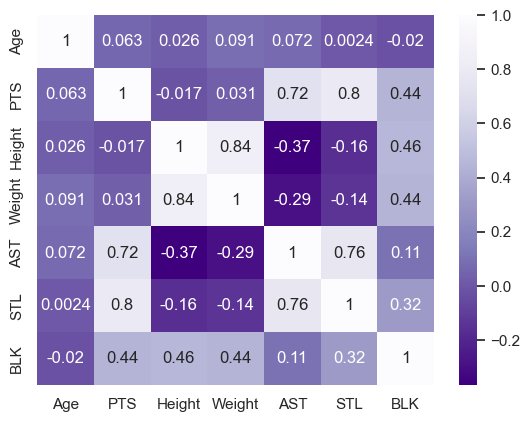

In [110]:
# Python
names = ['Age',  'PTS',  'Height', 'Weight', 'AST', 'STL', 'BLK']

data = nba_stats[names]
data = data.dropna() # удаление строк с пропусками

fig = plt.figure()
sns.heatmap(data.corr(), cmap="Purples_r", annot=True)  

plt.show()

Проделаем то же самое на R:

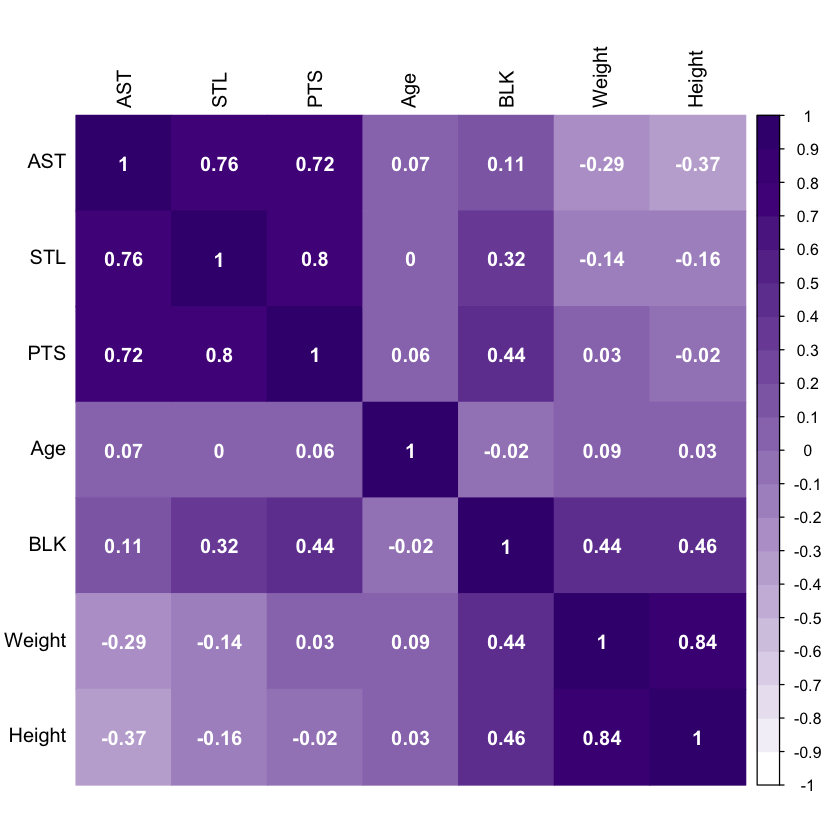

In [19]:
# R
data3 <- nba_stats[, c(19, 25, 4, 33, 30, 17, 18)]

MATRIX <- cor(data3)
col4 <- colorRampPalette(c("white", "#3F007D")) 

corrplot(MATRIX, method = "color", col = col4(20), cl.length = 21,
         order = "AOE",  tl.col = "black", addCoef.col = "white")

Итак, мы можем видеть, что существуют некоторые зависимости.
- Существует строго негативная корреляция между весом (Height) игрока и количеством его результативных передач (AST). Действительно, высокие игроки скорее чаще получают пасы и завершают атаку, нежели пасуются сами.
- Существует положительная корреляция между весом (Weight), ростом (Height) и блокшотами (BLK). Это соотносится с реальностью, крепкие игроки легко "закрывают" бросок более низких противников.
- Есть небольшая положительная корреляция между возрастом (Age) игрока и его набранными очками (PTS), но она не настолько сильная, как это могло бы ожидаться.

**<span style="color:#6852A3">
Фактор инфляции дипсперсии:
</span>**

**Фактор инфляции дисперсии** — это мера мультиколлинеарности, которая существует в наборе переменных, участвующих в множественных регрессиях.

Как правило, значение vif выше 10 указывает на высокую корреляцию с другими независимыми переменными.

In [149]:
# Python
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

names = [ 'pts',  'player_height', 'player_weight', 'ast', 'reb', 'gp']

data = nba_players[names]
data = data.dropna() # удаление строк с пропусками

X = add_constant(data)  
ds = pd.Series([variance_inflation_factor(X.values, i)   
               for i in range(X.shape[1])],   
              index=X.columns)  
print(ds)

const            1156.930429
pts                 3.147758
player_height       3.692932
player_weight       3.308923
ast                 2.574216
reb                 2.773611
gp                  1.495791
dtype: float64


Данный метод не указывает на наличие корреляции моих данных, а именно взаимосвязи характеристик игрока и его игровых показателях. 

<span style="color:#6852A3">
<h2>

11.  Исследовать  зависимости  в  данных  с  помощью  дисперсионного анализа.

</h2>
</span>

In [15]:
# Python
import scipy.stats as stats
from scipy.stats import f_oneway

c_pts = nba_stats[nba_stats['Pos'] == 'C']['PTS']
pg_pts = nba_stats[nba_stats['Pos'] == 'PG']['PTS']

c_ast = nba_stats[nba_stats['Pos'] == 'C']['AST']
pg_ast = nba_stats[nba_stats['Pos'] == 'PG']['AST']

c_stl = nba_stats[nba_stats['Pos'] == 'C']['STL']
pg_stl = nba_stats[nba_stats['Pos'] == 'PG']['STL']

print(stats.f_oneway(c_pts, pg_pts))
print(stats.f_oneway(c_ast, pg_ast))
print(stats.f_oneway(c_stl, pg_stl))

F_onewayResult(statistic=0.5985695617039988, pvalue=0.44031034129506275)
F_onewayResult(statistic=47.12073364294072, pvalue=1.537605699741845e-10)
F_onewayResult(statistic=11.496955949580935, pvalue=0.0008857699760405417)


Значение `pvalue` в сравнении количестве результативных передач (AST) и перехватов (STL) < 0.05. Можем сделать вывод о том, что эти показатели для игроков центровой и разыгрывающий не эквивалентны. </br>
Что касается количества очков (PTS), то разницы нет. Значит игроки и на той, и на другой позиции с одинаковым успехом набирают очки в игре.


**<span style="color:#410083">
Однофакторный дисперсионный анализ:
</span>**

In [19]:
# R
summary(aov(nba_stats$PTS ~ nba_stats$Pos))

               Df   Sum Sq Mean Sq F value Pr(>F)
nba_stats$Pos   4   320276   80069   0.438  0.781
Residuals     417 76174525  182673               

**<span style="color:#410083">
Линейная модель (Однофакторный дисперсионный анализ):
</span>**

In [20]:
A1 <- lm(nba_stats$PTS ~ nba_stats$Pos)
summary(A1)


Call:
lm(formula = nba_stats$PTS ~ nba_stats$Pos)

Residuals:
   Min     1Q Median     3Q    Max 
-556.8 -367.6  -83.0  275.1 1681.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      504.181     50.370  10.010   <2e-16 ***
nba_stats$PosPF  -22.358     67.578  -0.331    0.741    
nba_stats$PosPG   52.569     68.643   0.766    0.444    
nba_stats$PosSF   -7.523     70.290  -0.107    0.915    
nba_stats$PosSG   31.099     66.059   0.471    0.638    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 427.4 on 417 degrees of freedom
Multiple R-squared:  0.004187,	Adjusted R-squared:  -0.005365 
F-statistic: 0.4383 on 4 and 417 DF,  p-value: 0.7809


**<span style="color:#410083">
Таблица дисперсионного анализа:
</span>**

In [21]:
anova(A)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
nba_stats$Pos,4,320276.2,80069.04,0.4383196,0.7809246
Residuals,417,76174524.8,182672.72,NA,NA


**<span style="color:#410083">
Двухфакторный дисперсионный анализ:
</span>**

In [22]:
A2 <- lm(nba_stats$PTS ~ nba_stats$Pos*nba_stats$Age)
summary(A2)
anova(A2)


Call:
lm(formula = nba_stats$PTS ~ nba_stats$Pos * nba_stats$Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-619.36 -339.74  -79.32  254.80 1699.15 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)  
(Intercept)                     820.96     344.57   2.383   0.0176 *
nba_stats$PosPF                -773.02     448.18  -1.725   0.0853 .
nba_stats$PosPG                -242.60     471.09  -0.515   0.6068  
nba_stats$PosSF                -445.62     471.71  -0.945   0.3454  
nba_stats$PosSG                -812.15     443.93  -1.829   0.0681 .
nba_stats$Age                   -11.34      12.20  -0.929   0.3533  
nba_stats$PosPF:nba_stats$Age    26.90      15.87   1.695   0.0908 .
nba_stats$PosPG:nba_stats$Age    10.54      16.89   0.624   0.5329  
nba_stats$PosSF:nba_stats$Age    15.70      16.73   0.938   0.3487  
nba_stats$PosSG:nba_stats$Age    30.91      15.96   1.937   0.0534 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
nba_stats$Pos,4,320276.2,80069.04,0.4404061,0.7794033
nba_stats$Age,1,367483.4,367483.42,2.0212799,0.1558649
nba_stats$Pos:nba_stats$Age,4,902436.7,225609.17,1.2409247,0.2928848
Residuals,412,74904604.7,181807.29,NA,NA


**<span style="color:#410083">
Трёхфакторный дисперсионный анализ:
</span>**

In [24]:
A2 <- lm(nba_stats$PTS ~ nba_stats$Pos*nba_stats$Age*nba_stats$Height)
summary(A2)
anova(A2)


Call:
lm(formula = nba_stats$PTS ~ nba_stats$Pos * nba_stats$Age * 
    nba_stats$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-627.70 -328.86  -76.88  256.05 1702.90 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     31078.865  17905.677   1.736
nba_stats$PosPF                                -21908.180  27411.683  -0.799
nba_stats$PosPG                                -36707.431  22561.917  -1.627
nba_stats$PosSF                                -12793.442  31403.253  -0.407
nba_stats$PosSG                                -35834.687  22440.746  -1.597
nba_stats$Age                                   -1168.918    638.410  -1.831
nba_stats$Height                                 -146.012     86.167  -1.695
nba_stats$PosPF:nba_stats$Age                     655.180    958.602   0.683
nba_stats$PosPG:nba_stats$Age                    1429.410    823.111   1.737
nba_stats$PosSF:nba_stats$Age 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
nba_stats$Pos,4,320276.2,80069.04,0.4420848,0.77817742
nba_stats$Age,1,367483.4,367483.42,2.0289845,0.15509949
nba_stats$Height,1,648384.6,648384.62,3.5799230,0.05920022
nba_stats$Pos:nba_stats$Age,4,799049.7,199762.44,1.1029474,0.35473494
nba_stats$Pos:nba_stats$Height,4,697844.6,174461.15,0.9632515,0.42750459
nba_stats$Age:nba_stats$Height,1,192929.5,192929.47,1.0652206,0.30264803
nba_stats$Pos:nba_stats$Age:nba_stats$Height,4,659831.8,164957.94,0.9107815,0.45754384
Residuals,402,72809001.2,181116.92,NA,NA


<span style="color:#6852A3">
<h2>

12.   Подогнать регрессионные модели  к данным, а также оценить качество подобной аппроксимации

</h2>
</span>

**<span style="color:#6852A3">
Линейная регрессионная модель:
</span>**

**Модель линейной регрессии** устанавливает связь между зависимой переменной ( y ) и по крайней мере одной независимой переменной ( x ) как:

$$ \widetilde{y} = b_1 \cdot x + b_0 $$

В методе OLS мы должны выбрать $b_1$ значения, а также $b_0$ таким образом, чтобы минимизировать общую сумму квадратов разницы между вычисленными и наблюдаемыми значениями y. </br>
**Формула для OLS**:

$$ S = \sum_{i=1}^{n} (y_i - \widetilde{y_i})^2 = \sum_{i=1}^{n} (y_i - b_1 \cdot x - b_0)^2 = \sum_{i=1}^{n} (\widetilde{\xi})^2 = min $$

Где, </br>
$\widetilde{y_i}$ = прогнозируемое значение для i-го наблюдения </br>
$y_i$ = фактическое значение для i-го наблюдения </br>
$\widetilde{\xi}$ = ошибка / невязка для i-го наблюдения </br>
$n$ = общее количество наблюдений </br>

Чтобы получить значения $b_1$, а также  $b_0$, которые минимизируют $S$, мы можем взять частную производную для каждого коэффициента и приравнять ее к нулю.

Будем рабоать со следующими данными:</br>
3PA - (3 Points Attempt) все попытки трёхочкового броска
3PM - (3 Points Made) реализованные трёхочковые броски, попавшие в кольцо

In [114]:
# Python
x = nba_stats["3PA"]
y = nba_stats["3PM"]

x = sm.add_constant(x)
result = sm.OLS(y, x).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    3PM   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 16 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:46:17   Log-Likelihood:                -1663.5
No. Observations:                 490   AIC:                             3331.
Df Residuals:                     488   BIC:                             3339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4235      0.436     -5.560      0.0

Получили следующую формулу: $$3PM =  0.3716 \cdot 3PA - 2.4235$$

Сравним результаты с реальными. По официальной статистике NBA на данный момент процент попадания трёхочковых бросков составляет 34.9 %. </br>
Учитывая, что линейную модель выше я строила на данных умеренного размера, это очень хороший и довольно точный результат.

In [25]:
# R
lin <- lm(nba_stats$X3PM ~ nba_stats$X3PA)
summary(lin)


Call:
lm(formula = nba_stats$X3PM ~ nba_stats$X3PA)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.585  -2.745   1.166   2.509  56.013 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.509030   0.487301  -5.149 4.04e-07 ***
nba_stats$X3PA  0.373041   0.002771 134.642  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.452 on 420 degrees of freedom
Multiple R-squared:  0.9774,	Adjusted R-squared:  0.9773 
F-statistic: 1.813e+04 on 1 and 420 DF,  p-value: < 2.2e-16


Получили следующую формулу: $$3PM =  0.373041 \cdot 3PA - 2.50903$$ Формула, в целом, логически довольно близка к реальным данным и к тому, что мы получили ранее, используя Python.

Другие виды регрессий:
- Логистическая регрессия
- Полиномиальная регрессия
- Квантильная регрессия
- Лассо-регрессия / Ридж-регрессия
- Метод главных компонент
- Регрессия наименьших частичных квадратов
- Порядковая регрессия
- Регрессия Пуассона / Отрицательная биноминальная регрессия
- Регрессия Кокса

**<span style="color:#6852A3">
Полиномиальная регрессионная модель:
</span>**

В статистике, полиномиальная регрессия - это форма регрессионного анализа, в которой взаимосвязь между независимая переменная x и зависимая переменная y моделируются как полином $n$-й степени от $x$. Полиномиальная регрессия соответствует нелинейной зависимости между значением $x$ и соответствующим условным средним $y$, обозначенным $E (y | x)$. Хотя полиномиальная регрессия соответствует нелинейной модели данных, как проблема статистической оценки она является линейной в том смысле, что функция регрессии $E (y | x)$ линейна относительно неизвестных параметров, которые оцениваются на основе данных . По этой причине полиномиальная регрессия считается частным случаем множественной линейной регрессии.

Этот тип регрессии принимает форму:

$$Y = β_0 + β_1 X_1 + β_2 X^2 + … + β_n X^n + ε$$

где n — «степень» многочлена.

In [45]:
# R
polynomial = lm(nba_stats$X3PM ~ poly(nba_stats$X3PA, degree = 3, raw = T))
summary(polynomial)


Call:
lm(formula = nba_stats$X3PM ~ poly(nba_stats$X3PA, degree = 3, 
    raw = T))

Residuals:
    Min      1Q  Median      3Q     Max 
-31.756  -2.040   0.390   1.648  50.965 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                -7.288e-01  5.598e-01  -1.302
poly(nba_stats$X3PA, degree = 3, raw = T)1  3.322e-01  1.396e-02  23.798
poly(nba_stats$X3PA, degree = 3, raw = T)2  6.906e-05  7.237e-05   0.954
poly(nba_stats$X3PA, degree = 3, raw = T)3  8.468e-08  9.433e-08   0.898
                                           Pr(>|t|)    
(Intercept)                                   0.194    
poly(nba_stats$X3PA, degree = 3, raw = T)1   <2e-16 ***
poly(nba_stats$X3PA, degree = 3, raw = T)2    0.341    
poly(nba_stats$X3PA, degree = 3, raw = T)3    0.370    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.929 on 418 degrees of freedom
Multiple R-squared:  0.9805,	Adjuste

$$3PM =  -0.7288 + 0.3322 \cdot 3PA + 0.00006906 \cdot 3PA^2 + 0.00000008468 \cdot 3PA^3$$

Таким образом, полиномиальная модель также дала нам очень хороший результат.

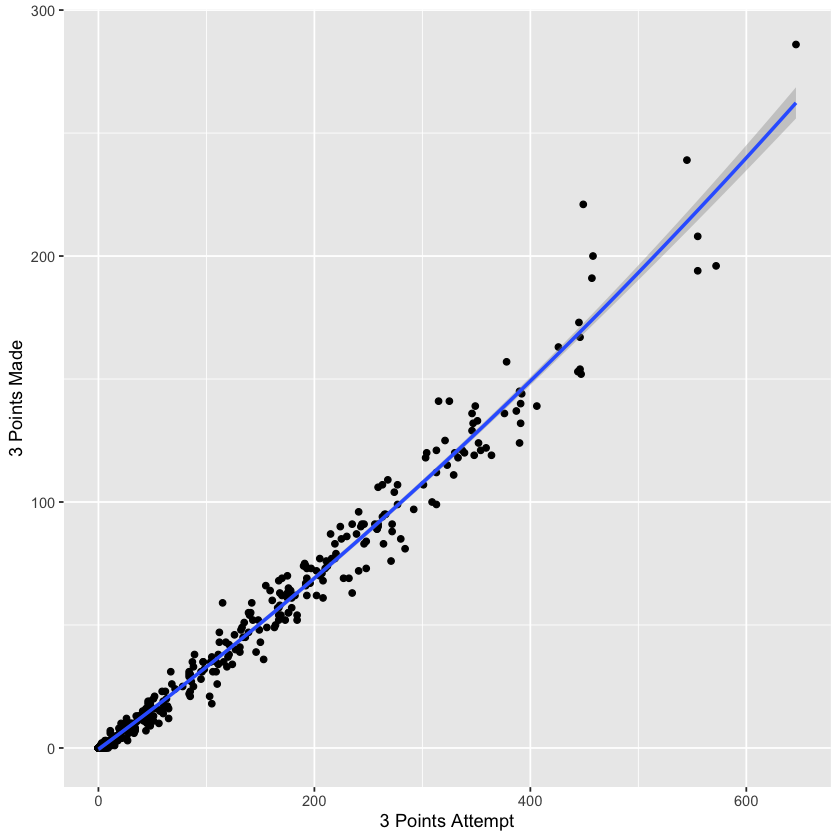

In [55]:
ggplot(nba_stats, aes(x=nba_stats$X3PA, y=nba_stats$X3PM)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x,2), size = 1) + 
          xlab('3 Points Attempt') +
          ylab('3 Points Made')